In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import os 
from pathlib import Path
import shutil 
import pickle 

In [2]:
graphinfo = pickle.load(open("codegraphs/diversevul/diversevul_graph_info.pkl", "rb"))

In [3]:
logit_folders = [
    'runs/20240416-123420_9_FINAL_BareboneGCN_test/models/logits.pt',
    'runs/20240416-123910_9_FINAL_BareboneGIN_test/models/logits.pt',
    'runs/20240418-121306_9_FINAL_DRGCN_crossval_sl_dir_meanaggr_test/models/logits.pt',
    'runs/20240416-124942_9_FINAL_DRGCN_crossval_sl_dir_sumaggr_test/models/logits.pt',
    'runs/20240416-143913_9_FINAL_Reveal_crossval_ud_test/models/logits.pt',
    'runs/20240416-144108_9_finalHGPSL_crossval_sl_ud_test/models/logits.pt',
    'runs/20240418-080418_9_FINAL_GraphGLOW_GCN_crossval_sl_ud_test/models/logits.pt',
    'runs/20240422-071611_9_FINAL_GraphGLOW_GIN_crossval_sl_ud_test/models/logits.pt',
    'runs/20240417-072542_9_2try_GIN_withnaivepredictor_linkpred_final/models/logits.pt',
    'runs/20240419-081128_9_try_GIN_pretraining_featuremask_second_stagecwe/models/logits.pt',
    # 'runs/20240419-190758_9_FINAL_BareboneGIN_crossval_sl_ud_512/models/logits.pt'
    
    
]
from tqdm.auto import tqdm

names = ['GCN', 'GIN', 'RGCN-mean', 'RGCN-sum', 'REVEAL', 'HGPSL', 'GraphGLOW', 'GraphGLOW: GIN', 'GIN: link-prediction', 'GIN: feature masking + cwe']
datadict = {}

len_= set()
for i, logit_folder in enumerate(logit_folders):
    logits = torch.load(logit_folder)
    templogits = {}
    for key in logits.keys():
        if key != 'filenames':
            templogits[key] = logits[key].cpu().numpy()
        else:
            templogits[key] = logits[key] 
    logits = templogits
    filenames = []
    for fil in logits['filenames']:
        filenames += fil 
        
    
            
        
    if len(len_) == 0:
        for name in filenames:
            len_.add(name)
            
    # get graph sizes 
    if not os.path.exists('codegraphs/diversevul/diversevul_graph_sizes.pt'):
        folder = 'v2_undirected_withdegreecount'
        sizes = {}
        for filename in tqdm(len_):
            sizes[filename] = torch.load(f'codegraphs/diversevul/{folder}/{filename}').x.shape[0] 
        
        torch.save(sizes, 'codegraphs/diversevul/diversevul_graph_sizes.pt')
    else:
        sizes = torch.load('codegraphs/diversevul/diversevul_graph_sizes.pt')
        
        # len_ = set(logits['filenames'])
                   
    datadict[names[i]] = {}
    # datadict[names[i]]['y'] = [] #logits['y']
    # datadict[names[i]]['y_hat'] = []#logits['y_hat']
    # datadict[names[i]]['filenames'] =[]# logits['filenames']
    # datadict[names[i]]['logits'] = []
    lastkey = None 
    for key in logits.keys():
        if key not in ['y', 'y_hat', 'filenames']:
            lastkey = key 
    
    for j in range(logits['y'].shape[0]):
        if filenames[j] in len_:
            datadict[names[i]][filenames[j]] = {}
            # datadict[names[i]]['y'].append(logits['y'][j])
            # datadict[names[i]]['y_hat'].append(logits['y_hat'][j])
            # datadict[names[i]]['filenames'].append(filenames[j])
            # datadict[names[i]]['logits'].append(logits[lastkey][j])
            datadict[names[i]][filenames[j]]['y'] = logits['y'][j]
            datadict[names[i]][filenames[j]]['y_hat'] = logits['y_hat'][j]
            datadict[names[i]][filenames[j]]['logits'] = logits[lastkey][j]
      
# add num_nodes which has as logits graph lengths and as y_hat graph length> 102
datadict['num_nodes'] = {}
for key in sizes.keys():
    datadict['num_nodes'][key] = {}
    
    if sizes[key] > 102:
        datadict['num_nodes'][key]['y_hat'] = 1
    else:
        datadict['num_nodes'][key]['y_hat'] = 0
        
    datadict['num_nodes'][key]['logits'] = sizes[key]
    datadict['num_nodes'][key]['y'] = datadict['GIN'][key]['y']
        
        
        
      

/opt/conda/envs/pyg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(array([9477., 7276., 5317., 3765., 2862., 2228., 1834., 1455., 1204.,
         887.,  848.,  721.,  599.,  505.,  444.,  363.,  345.,  323.,
         270.,  236.,  244.,  195.,  199.,  171.,  168.,  141.,  115.,
          88.,   89.,  104.,   82.,   65.,   89.,   65.,   71.,   70.,
          58.,   67.,   50.,   42.,   48.,   47.,   57.,   42.,   36.,
          36.,   36.,   35.,   29.,   22.]),
 array([  10. ,   29.8,   49.6,   69.4,   89.2,  109. ,  128.8,  148.6,
         168.4,  188.2,  208. ,  227.8,  247.6,  267.4,  287.2,  307. ,
         326.8,  346.6,  366.4,  386.2,  406. ,  425.8,  445.6,  465.4,
         485.2,  505. ,  524.8,  544.6,  564.4,  584.2,  604. ,  623.8,
         643.6,  663.4,  683.2,  703. ,  722.8,  742.6,  762.4,  782.2,
         802. ,  821.8,  841.6,  861.4,  881.2,  901. ,  920.8,  940.6,
         960.4,  980.2, 1000. ]),
 <BarContainer object of 50 artists>)

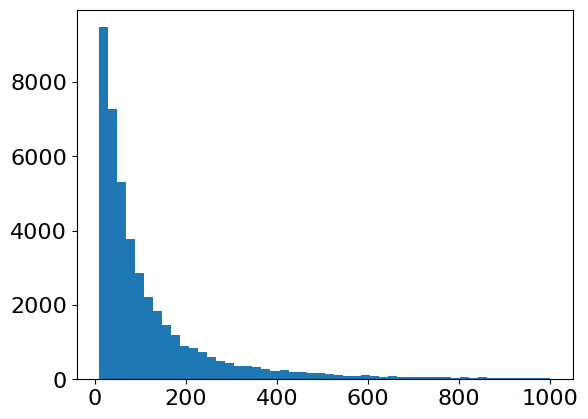

In [5]:
import matplotlib.pyplot as plt

# hist graph sizes, variable is size with values being graph sizes
plt.hist(list(sizes.values()), bins=50)

In [6]:
!pip install seaborn

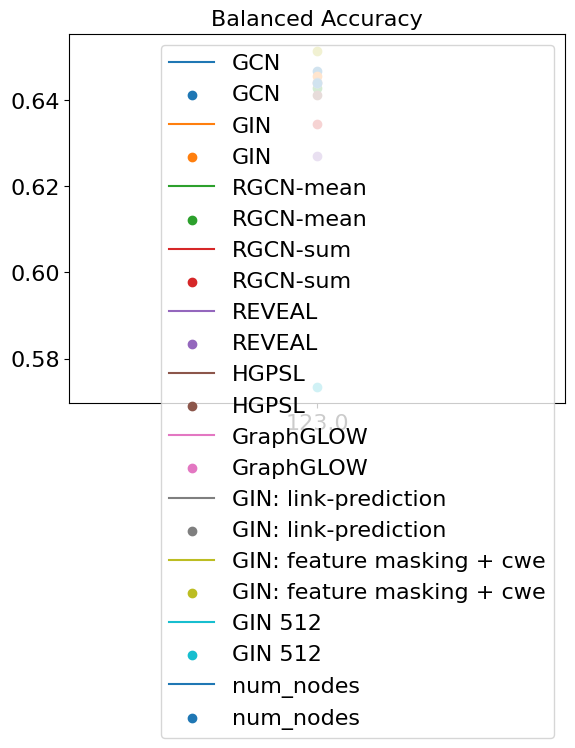

In [40]:
# divide files into 10 equal num bins based on graph size
num_bins = 1
bins = [[] for _ in range(num_bins)]
binsizes = [[] for _ in range(num_bins)]

sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])

len_files = len(sorted_sizes)
current_bin = 0
for file in sorted_sizes:
    # fill bins from the bottom
    bins[current_bin].append(file[0])
    binsizes[current_bin].append(file[1])
    if len(bins[current_bin]) >= len_files / num_bins:
        current_bin += 1
        
# plot performance of each model on each bin
bin_average_size = [np.mean(bin) for bin in binsizes]
# for model in datadict.keys():
#     model_performance = []
#     for bin in bins:
#         bin_performance = []
#         for file in bin:
#             bin_performance.append(datadict[model][file]['y'] == datadict[model][file]['y_hat'])
#         model_performance.append(sum(bin_performance) / len(bin_performance))
#     plt.plot(model_performance, label=model)
#     # x-axis is average size of bin
#     plt.xticks(range(10), [round(x,0) for x in bin_average_size])

# plot model balanced accuracy on each bin
from sklearn.metrics import balanced_accuracy_score
for model in datadict.keys():
    model_performance = []
    for bin in bins:
        y_true = []
        y_pred = []
        for file in bin:
            y_true.append(datadict[model][file]['y'])
            y_pred.append(datadict[model][file]['y_hat'])
        model_performance.append(balanced_accuracy_score(y_true, y_pred))
    
    plt.title('Balanced Accuracy')
    plt.plot(model_performance, label=model)
    plt.scatter(range(num_bins), model_performance, label=model)
    # x-axis is average size of bin
    plt.xticks(range(num_bins), [round(x,0) for x in bin_average_size])
    
    plt.legend()

GCN 0.5105032165981995
GIN 0.5229939359962432
RGCN-mean 0.5098066099553431
RGCN-sum 0.5097227832718433
REVEAL 0.5006132389423368
HGPSL 0.5028427470039866
GraphGLOW 0.506477662392082
GraphGLOW: GIN 0.5189961275323206
GIN: link-prediction 0.5060644264751797
GIN: feature masking + cwe 0.5130979732842116
num nodes 0.6439211843549226 0.19501133786848074 0.11541411042944785 0.6283924843423799
num_nodes 0.5


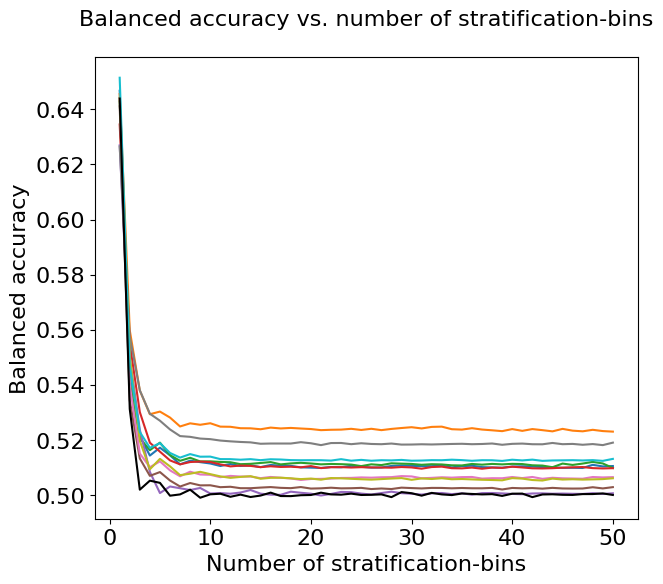

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

num_bins_range = range(1, 51)  # Adapt this range as per your needs
fig= plt.figure(figsize=(7, 6))
for model in datadict.keys():
    perf_vs_bins = []

    for num_bins in num_bins_range:
        # Divide files into num_bins based on graph size
        bins = [[] for _ in range(num_bins)]
        sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])
        len_files = len(sorted_sizes)

        current_bin = 0
        for file in sorted_sizes:
            # Fill bins from the bottom
            bins[current_bin].append(file[0])
            if len(bins[current_bin]) >= len_files / num_bins:
                current_bin += 1

        # Calculate model performance on each bin and average
        model_performance = []
        for bin in bins:
            y_true = []
            y_pred = []
            for file in bin:
                y_true.append(datadict[model][file]['y'])
                y_pred.append(datadict[model][file]['y_hat'])
            model_performance.append(balanced_accuracy_score(y_true, y_pred))
        if num_bins==1 and model=='num_nodes':
            # balanced accuracy
            bacc = balanced_accuracy_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred)
            recall = recall_score(y_true, y_pred)
            print('num nodes', bacc, f1, precision, recall)
        
        # print(f"Model: {model}, Num bins: {num_bins}, Mean balanced accuracy: {np.mean(model_performance)}",model_performance)
        mean_perf = np.mean(model_performance)
        perf_vs_bins.append(mean_perf)

    # Plot balanced accuracy as a function of num_bins
    print(model, perf_vs_bins[-1])
    if model=='num_nodes':
        color = 'black'
        plt.plot(num_bins_range, perf_vs_bins, label=model, color=color)
    else:
        plt.plot(num_bins_range, perf_vs_bins, label=model)

plt.title('Balanced accuracy vs. number of stratification-bins',y = 1.05)
plt.xlabel('Number of stratification-bins')
plt.ylabel('Balanced accuracy')
# leg = plt.legend(bbox_to_anchor=(1, 1.02), ncol=1)

# # leg = ax.legend(loc='lower right')
# leg.get_frame().set_edgecolor('black')
# # # background white of legend white
# leg.get_frame().set_facecolor('white')
# # # set backgrond non-transparent
# leg.get_frame().set_alpha(1)
# set edge color 
# leg.get_frame().set_linewidth(0.0)


plt.savefig(f"stratbins_balancedaccuracy_withpretrain_correctbacc.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

num_bins_range = range(1, 50)  # Adapt this range as per your needs

fig= plt.figure(figsize=(7, 6))
for model in datadict.keys():
    perf_vs_bins = []

    for num_bins in num_bins_range:
        # Divide files into num_bins based on graph size
        bins = [[] for _ in range(num_bins)]
        sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])
        len_files = len(sorted_sizes)

        current_bin = 0
        for file in sorted_sizes:
            # Fill bins from the bottom
            bins[current_bin].append(file[0])
            if len(bins[current_bin]) >= len_files / num_bins:
                current_bin += 1

        # Calculate model performance on each bin and average
        model_performance = []
        for bin in bins:
            y_true = []
            y_pred = []
            for file in bin:
                y_true.append(datadict[model][file]['y'])
                y_pred.append(datadict[model][file]['y_hat'])
            model_performance.append(f1_score(y_true, y_pred))
        
        mean_perf = np.mean(model_performance)
        perf_vs_bins.append(mean_perf)

    # Plot balanced accuracy as a function of num_bins
    if model=='num_nodes':
        color = 'black'
        plt.plot(num_bins_range, perf_vs_bins, label=model, color=color)
    else:
        plt.plot(num_bins_range, perf_vs_bins, label=model)
    print(model, perf_vs_bins[-1])



plt.title('F1 vs. number of stratification-bins',y = 1.05)
plt.xlabel('Number of stratification-bins')
plt.ylabel('F1')
# leg = plt.legend(loc='upper right', bbox_to_anchor=(1.76, 1), ncol=1)

# leg.get_frame().set_edgecolor('black')
# # # background white of legend white
# leg.get_frame().set_facecolor('white')
# # # set backgrond non-transparent
# leg.get_frame().set_alpha(1)
# set edge color 
# leg.get_frame().set_linewidth(0.0)
# set x lim
# plt.ylim(0, 0.3)

plt.savefig(f"stratbins_f1score_withpretrain_correctbacc.png", dpi=300, bbox_inches='tight')
plt.show()

GCN 0.1127795795094214
GIN 0.12902198789733732
RGCN-mean 0.11869223490149078
RGCN-sum 0.10511734088593477
REVEAL 0.05099696219533737
HGPSL 0.09612489146567718
GraphGLOW 0.10618586875496318
GraphGLOW: GIN 0.10511533352111173


In [36]:
len(sizes)

43520

In [ ]:
# for model plot both balanced accuracy and f1 in same plot, on bottom varying threshold
model = 'GIN'
# max threshold +2 std from mean
mean_logits = np.mean([datadict[model][key]['logits'] for key in datadict[model].keys()])
std_logits = np.std([datadict[model][key]['logits'] for key in datadict[model].keys()])
max_threshold = mean_logits + 2 * std_logits
min_threshold = mean_logits - 2 * std_logits

xticks = np.linspace(min_threshold, max_threshold, 10)
balanced_accuracies = []
f1_scores = []
for threshold in xticks:
    y_true = []
    y_pred = []
    for key in datadict[model].keys():
        y_true.append(datadict[model][key]['y'])
        y_pred.append(datadict[model][key]['logits'] > threshold)
    balanced_accuracies.append(balanced_accuracy_score(y_true, y_pred))
    f1_scores.append(f1_score(y_true, y_pred))
    
fig, ax1 = plt.subplots()

color = 'tab:red'

ax1.set_xlabel('Threshold')
ax1.set_ylabel('Balanced accuracy', color=color)


In [4]:
# model performance per cwe, cwe in 
# cwe_files = {}
cwe_files = {}
for d in graphinfo:
    if len(d['cwe']) > 0:
        cwe_files[str(d['commit_id'])+'_'+str(d['hash'])+'_'+str(d['target'])+'.cpg.pt'] = d['cwe']

set_Files = set(list(cwe_files.keys()))

model_performances = {}

for model in datadict.keys():
    count1 = 0
    count2 = 0
    already = set()
    model_performance = {}
    for file in datadict[model].keys():
        if file in set_Files:
            cwes = cwe_files[file]
            for cwe in cwes:
                if cwe not in model_performance:
                    model_performance[cwe] = {}
                    model_performance[cwe]['y'] = []
                    model_performance[cwe]['y_hat'] = []
                    model_performance[cwe]['logits'] = []
                    model_performance[cwe]['fileslength'] = []
                
                if file not in already:
                    count1 += 1
                count2 += 1
                already.add(file) 
                model_performance[cwe]['y'].append(datadict[model][file]['y'])
                model_performance[cwe]['y_hat'].append(datadict[model][file]['y_hat'])
                model_performance[cwe]['logits'].append(datadict[model][file]['logits'])
                model_performance[cwe]['fileslength'].append(sizes[file])
    print(model, count1)
    print(model, count2)
    print("datadictlen", len(datadict[model].keys()))
    model_performances[model] = model_performance   

GCN 34285
GCN 40257
datadictlen 43520
GIN 34285
GIN 40257
datadictlen 43520
RGCN-mean 34285
RGCN-mean 40257
datadictlen 43520
RGCN-sum 34285
RGCN-sum 40257
datadictlen 43520
REVEAL 34285
REVEAL 40257
datadictlen 43520
HGPSL 34285
HGPSL 40257
datadictlen 43520
GraphGLOW 34285
GraphGLOW 40257
datadictlen 43520
GraphGLOW: GIN 34285
GraphGLOW: GIN 40257
datadictlen 43520
GIN: link-prediction 34285
GIN: link-prediction 40257
datadictlen 43520
GIN: feature masking + cwe 34285
GIN: feature masking + cwe 40257
datadictlen 43520
num_nodes 34285
num_nodes 40257
datadictlen 43520


In [8]:
len(cwe_files)

281734

In [5]:
# cwe counts
cwe_counts = {}
for cwefile, cwe in cwe_files.items():
    for c in cwe:
        if c not in cwe_counts:
            cwe_counts[c] = 0
        cwe_counts[c] += 1

# sort cwes by count
sorted_cwes = sorted(cwe_counts.items(), key=lambda x: x[1], reverse=True)
sorted_cwe_indices = [x[0] for x in sorted_cwes]

In [35]:
largest10cwe = [x[0] for x in sorted_cwes[:10]]

In [ ]:
# plot model performances per cwe for all models as scatter plot in one plot
# balanced accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(14, 6))
for model in model_performances.keys():
    cwe_perf = [-1 for _ in range(len(sorted_cwes))]
    for cwe in model_performances[model].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        bacc = balanced_accuracy_score(y_true, y_pred)
        # cwe_perf.append(bacc)
        cwe_perf[sorted_cwe_indices.index(cwe)] = bacc
    if model=='num_nodes':
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=1, c='black')
    else:
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=0.7)
    
    # rather plot accumulated performance
    # plt.plot(range(len(cwe_perf)), np.cumsum(cwe_perf), label=model)
            
plt.title('Balanced Accuracy per CWE')
plt.ylabel('Balanced accuracy')
plt.xlabel('CWEs sorted by count (descending)')
plt.legend()
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
# plt.ylim(0, 1000)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
plt.savefig(f"bacc_vs_cwe.png", dpi=300, bbox_inches='tight')
plt.ylim(0, 1)

# make xticks from 1 to 150 
plt.xticks(range(0, 151, 10))

In [17]:
len(model_performances['GIN'].keys())

86

In [14]:

from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score

for model in model_performances.keys():
    bacc = []
    best_thresholds = []
    best_baccs = []
    for cwe in model_performances['num_nodes'].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        if len(y_true) == sum(y_true) or sum(y_true) == 0:
            # print("contune", model)
            continue
        bacc.append(balanced_accuracy_score(y_true, y_pred))
        
        if model=='num_nodes':
            # use logits and get best threshold
            numnodesingraph = model_performances[model][cwe]['logits']
            
            best_threshold = None
            best_bacc = 0
            if len(y_true) == sum(y_true) or sum(y_true) == 0:
                continue
            
            for threshold in range(min(numnodesingraph)-1, max(numnodesingraph)+1):
                y_pred = [1 if x > threshold else 0 for x in numnodesingraph]
                b = balanced_accuracy_score(y_true, y_pred)
                if b > best_bacc:
                    best_bacc = b
                    best_threshold = threshold
                
             
                
            best_baccs.append(best_bacc)
            best_thresholds.append(best_threshold)
            print(cwe, best_threshold, best_bacc)
                
                
    print(model, np.mean(bacc))
    if model=='num_nodes':
        print(best_thresholds)
        print(np.mean(best_baccs))
    

GCN 0.6525770370372614
GIN 0.6560903079846311
RGCN-mean 0.6563767647128442
RGCN-sum 0.6392045561614598
REVEAL 0.6462169726188196
HGPSL 0.6437579065435977
GraphGLOW 0.6510181262721936
GraphGLOW: GIN 0.6193712689266653
GIN: link-prediction 0.6548109287239081
GIN: feature masking + cwe 0.6566973450408653
CWE-190 84 0.668426941584312
CWE-863 208 0.7363945578231292
CWE-120 66 0.7289930422815201
CWE-189 63 0.6801841948900773
CWE-119 126 0.6655488066518551
CWE-787 125 0.6477908582225129
CWE-399 144 0.6528289846851957
CWE-22 304 0.6617845117845118
CWE-20 84 0.649611370493463
CWE-287 120 0.6659493065518891
CWE-284 387 0.6697965571205008
CWE-770 146 0.7059011164274323
CWE-254 48 0.7432432432432432
CWE-59 71 0.6994850187265917
CWE-61 73 0.707810911555405
CWE-476 80 0.6620544416597047
CWE-703 239 0.5997654476089487
CWE-674 58 0.6138504421376394
CWE-266 130 0.7372881355932204
CWE-362 141 0.72746863066012
CWE-617 157 0.5810550458715597
CWE-125 125 0.6604443201903738
CWE-369 113 0.6619885410035302
CW

In [11]:
np.mean([84, 208, 66, 63, 126, 125, 144, 304, 84, 120, 387, 146, 48, 71, 73, 80, 239, 58, 130, 141, 157, 125, 113, 154, 94, 110, 267, 76, 61, 41, 53, 113, 320, 39, 65, 94, 110, 93, 101, 76, 247, 75, 184, 48, 30, 181, 256, 243, 233, 759, 28, 130, 15, 173, 79, 215, 157, 153, 781, 14, 83, 654, 117, 157, 454, 80, 101, 361, 63, 460, 250, 102, 213, 57, 39, 424, 142, 367, 323, 98, 114, 219, 173, 69])

167.61904761904762

In [15]:

from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
balanced_accuracy_score = f1_score
for model in model_performances.keys():
    bacc = []
    best_thresholds = []
    best_baccs = []
    for cwe in model_performances['num_nodes'].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        if len(y_true) == sum(y_true) or sum(y_true) == 0:
            # print("contune", model)
            continue
        bacc.append(balanced_accuracy_score(y_true, y_pred))
        
        if model=='num_nodes':
            # use logits and get best threshold
            numnodesingraph = model_performances[model][cwe]['logits']
            
            best_threshold = None
            best_bacc = 0
            if len(y_true) == sum(y_true) or sum(y_true) == 0:
                continue
            
            for threshold in range(min(numnodesingraph)-1, max(numnodesingraph)+1):
                y_pred = [1 if x > threshold else 0 for x in numnodesingraph]
                b = balanced_accuracy_score(y_true, y_pred)
                if b > best_bacc:
                    best_bacc = b
                    best_threshold = threshold
                
             
                
            best_baccs.append(best_bacc)
            best_thresholds.append(best_threshold)
            print(cwe, best_threshold, best_bacc)
                
                
    print(model, np.mean(bacc))
    if model=='num_nodes':
        print(best_thresholds)
        print(np.mean(best_baccs))
    

GCN 0.21824846977712348
GIN 0.21804012345555907
RGCN-mean 0.2130460535139745
RGCN-sum 0.20781425991364927
REVEAL 0.23819058839454135
HGPSL 0.20579225479759952
GraphGLOW 0.215506932748787
GraphGLOW: GIN 0.19977337305525283
GIN: link-prediction 0.227669410385808
GIN: feature masking + cwe 0.2235614808814078
CWE-190 187 0.27932960893854747
CWE-863 208 0.16666666666666666
CWE-120 215 0.2191780821917808
CWE-189 153 0.30864197530864196
CWE-119 126 0.25849433710859426
CWE-787 125 0.24437927663734116
CWE-399 289 0.23376623376623376
CWE-22 304 0.2524271844660194
CWE-20 299 0.25170068027210885
CWE-287 212 0.34545454545454546
CWE-284 387 0.358974358974359
CWE-770 474 0.3137254901960784
CWE-254 123 0.1111111111111111
CWE-59 326 0.2782608695652174
CWE-61 593 0.21052631578947367
CWE-476 235 0.24444444444444444
CWE-703 272 0.2112676056338028
CWE-674 84 0.2513089005235602
CWE-266 130 0.11428571428571428
CWE-362 175 0.27450980392156865
CWE-617 238 0.23622047244094488
CWE-125 132 0.33072100313479624
CWE

In [127]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from builtins import len

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score, matthews_corrcoef
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy
# balanced_accuracy_score = matthews_corrcoef

font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(10, 6))

best_singles = {}

count100 = 0
totalcount = 0
for num_bins in tqdm(range(1,3)):
    xssss = []
    
    best_singles[num_bins] = {}
    for cwe in model_performances['num_nodes'].keys():
        # if cwe not in largest10cwe:
            # continue
        best_bacc = 0
        best_stratif_bacc = 0 
        best_normal_stratif_bacc = 0
        
        best_y, best_y_hat = [], []
        
        for model in model_performances.keys():
            y_true = model_performances[model][cwe]['y']
            y_pred = model_performances[model][cwe]['y_hat']
            lenx = model_performances[model][cwe]['fileslength']
            
            # stratify into 15 bins
            bins = [[] for _ in range(num_bins)]
            
            # sort files by length
            sorted_files = sorted(zip(lenx, y_true, y_pred), key=lambda x: x[0])
            len_files = len(sorted_files)
            current_bin = 0
            for file in sorted_files:
                bins[current_bin].append(file)
                if len(bins[current_bin]) >= len_files / num_bins:
                    current_bin += 1
            
            actual_bins = []
            for bin in bins: 
                if len(bin) > 0:
                    actual_bins.append(bin)
            
            bins = actual_bins
            
            xsss = np.mean([len(bin) for bin in bins])
            xssss.append(xsss)
            # calculate balanced accuracy per bin
            bacc_per_bin = []
            avg_binsize = []
            for bin in bins:
                y_true_bin = [x[1] for x in bin]
                y_pred_bin = [x[2] for x in bin]
                if len(y_true_bin) == 0:
                    continue
                bacc = balanced_accuracy_score(y_true_bin, y_pred_bin)
                
                if bacc==1 and (sum(y_true_bin) == len(y_true_bin) or sum(y_true_bin) == 0):
                    # bacc == 0.5
                    count100 += 1
                    bacc=0.5
                    continue
           
                    # print('now')
                    # print(bacc_per_bin)
                totalcount +=1
                binsize = len(y_true_bin)
                bacc_per_bin.append(bacc)
            
            
            # print('bin number',num_bins)
            # print('bin_size', len(bacc_per_bin))
                
            bacc = np.mean(bacc_per_bin)
            normal_bacc = balanced_accuracy_score(y_true, y_pred)
            # if model =='num_nodes' and num_bins ==5 and cwe=='CWE-665': 
            #     print('num_nodes', cwe, bacc, bacc_per_bin)
            
            if cwe not in best_singles[num_bins]:
                best_singles[num_bins][cwe] = {}
            
            if model not in best_singles[num_bins][cwe]:
                best_singles[num_bins][cwe][model] = {'bacc': [bacc], 'normal_bacc': [normal_bacc], 'num_samples': [len(y_true)]}

            else:
                
                # best_singles[num_bins][model]['y'] += y_true
                # best_singles[num_bins][model]['y_hat'] += y_pred
                best_singles[num_bins][cwe][model]['bacc'].append(bacc)
                best_singles[num_bins][cwe][model]['normal_bacc'].append(normal_bacc)
                best_singles[num_bins][cwe][model]['num_samples'].append(len(y_true))
    
    print('xssss avg', np.mean(xssss), np.min(xssss), np.median(xssss),'num_bins', num_bins)

  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: inval

xssss avg 468.1046511627907 2.0 100.0 num_bins 1


/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/pyg/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide

xssss avg 234.05232558139534 1.0 50.0 num_bins 2


<Figure size 1000x600 with 0 Axes>

In [72]:
best_singles[num_bins][cwe][model]

{'bacc': [0.5], 'normal_bacc': [0.6666666666666666], 'num_samples': [4]}

In [49]:
best_singles[1][cwe][model]

{'bacc': [0.6559510141599694],
 'normal_bacc': [0.6559510141599694],
 'num_samples': [214]}

In [71]:
data = []

for num_bins, cwe_values in best_singles.items():
    for cwe, model_values in cwe_values.items():
        for model, value2 in model_values.items():
            bacc = value2['bacc']
            data.append([model, num_bins, value2['num_samples'], cwe, bacc[0], 'bacc', cwe_counts[cwe]])
            # reordered[model][num_bins].append(value2['bacc'])
            
    

In [90]:
reordered

{'num_nodes': {3: 0.4879272640854965}}

GCN [0.6506898634184548, 0.5638250122422132]
GIN [nan, nan]
RGCN-mean [nan, nan]
RGCN-sum [0.6384589352540504, 0.5603895557952772]
REVEAL [nan, nan]
HGPSL [nan, nan]
GraphGLOW [nan, nan]
GraphGLOW: GIN [nan, nan]
GIN: link-prediction [nan, nan]
GIN: feature masking + cwe [nan, nan]
num_nodes [nan, nan]


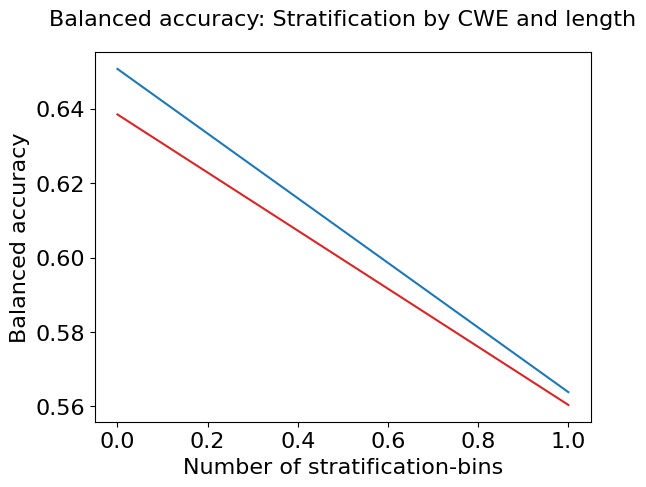

In [128]:
reordered = {} 

for num_bins, cwe_values in best_singles.items():
    for cwe, model_values in cwe_values.items():
        for model, value2 in model_values.items():
            if model not in reordered:
                reordered[model] = {}
            if num_bins not in reordered[model]:
                reordered[model][num_bins] = []
                
            reordered[model][num_bins].append(value2['bacc'])
            
    for model in reordered.keys():
        for num_bins in reordered[model].keys():
            reordered[model][num_bins] = np.mean(reordered[model][num_bins])
# reduce to model -> perf
for model_key, value in reordered.items():
    
    sort_values_by_their_keys = sorted(value.items(), key=lambda x: x[0])
    only_baccs = [x[1] for x in sort_values_by_their_keys]

    if model_key=='num_nodes':
        color = 'black'
        plt.plot(range(len(only_baccs))[:], only_baccs[:], label=model_key, color=color)
        print(model_key, only_baccs)
    else:
        plt.plot(range(len(only_baccs))[:], only_baccs[:], label=model_key)
        print(model_key, only_baccs)
    # print(model_key, only_baccs[-2])


plt.title('Balanced accuracy: Stratification by CWE and length',y = 1.05)
plt.xlabel('Number of stratification-bins')
plt.ylabel('Balanced accuracy')

# leg = plt.legend(loc='upper right', bbox_to_anchor=(1.83, 1), ncol=1)

# # leg = plt.legend(loc='upper right', bbox_to_anchor=(1.83, 1), ncol=1)

# leg.get_frame().set_edgecolor('black')
# # # background white of legend white
# leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
# leg.get_frame().set_alpha(1)newidth(0.0)
# set x lim
# plt.ylim(0, 0.3)
plt.savefig(f"stratbins_bacc_cwe_len_stratified_short_correctbacc.png", dpi=300, bbox_inches='tight')
plt.show()

In [124]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from builtins import len

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy

balanced_accuracy_score = f1_score
font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(10, 6))

best_singles = {}

for num_bins in tqdm(range(1, 2)):
    best_singles[num_bins] = {}
    for cwe in model_performances[model].keys():
        best_bacc = 0
        best_stratif_bacc = 0 
        best_normal_stratif_bacc = 0
        
        best_y, best_y_hat = [], []
        for model in model_performances.keys():
            y_true = model_performances[model][cwe]['y']
            y_pred = model_performances[model][cwe]['y_hat']
            lenx = model_performances[model][cwe]['fileslength']
            
            # stratify into 15 bins
            bins = [[] for _ in range(num_bins)]
            
            # sort files by length
            sorted_files = sorted(zip(lenx, y_true, y_pred), key=lambda x: x[0])
            len_files = len(sorted_files)
            current_bin = 0
            for file in sorted_files:
                bins[current_bin].append(file)
                if len(bins[current_bin]) >= len_files / num_bins:
                    current_bin += 1
            
            
            # calculate balanced accuracy per bin
            bacc_per_bin = []
            for bin in bins:
                y_true_bin = [x[1] for x in bin]
                y_pred_bin = [x[2] for x in bin]
                if len(y_true_bin) == 0:
                    continue
                bacc = balanced_accuracy_score(y_true_bin, y_pred_bin)
               
                    
                if bacc==1 and (sum(y_true_bin) == len(y_true_bin) or sum(y_true_bin) == 0):
                    bacc == 0.5
                    continue
                
                bacc_per_bin.append(bacc)
            
            bacc = np.mean(bacc_per_bin)
            normal_bacc = balanced_accuracy_score(y_true, y_pred)
            
            if cwe not in best_singles[num_bins]:
                best_singles[num_bins][cwe] = {}
            
            if model not in best_singles[num_bins][cwe]:
                best_singles[num_bins][cwe][model] = {'bacc': [bacc], 'normal_bacc': [normal_bacc], 'num_samples': [len(y_true)]}

            else:
                
                # best_singles[num_bins][model]['y'] += y_true
                # best_singles[num_bins][model]['y_hat'] += y_pred
                best_singles[num_bins][cwe][model]['bacc'].append(bacc)
                best_singles[num_bins][cwe][model]['normal_bacc'].append(normal_bacc)
                best_singles[num_bins][cwe][model]['num_samples'].append(len(y_true))
                    

100%|██████████| 1/1 [00:03<00:00,  3.87s/it]


<Figure size 1000x600 with 0 Axes>

In [57]:
for num_bins, cwe_values in best_singles.items():
    for cwe, model_values in cwe_values.items():
        for model, value2 in model_values.items():
            bacc = value2['bacc']
            data.append([model, num_bins, value2['num_samples'], cwe, bacc[0], 'f1', cwe_counts[cwe]])
            # reordered[model][num_bins].append(value2['bacc'])

In [58]:
# save data to csv
import pandas as pd
df = pd.DataFrame(data, columns=['model', 'num_bins', 'num_testset_samples', 'cwe', 'value', 'metric', 'cwe_count'])
# df.to_csv('models_performance_per_cwe_length_stratified.csv')

In [59]:
# add new column which is only cwe id eg df['cwe'] is 	CWE-190, only 190
df['cwe_id'] = df['cwe'].apply(lambda x: int(x.split('-')[1]))
cwes = pd.read_csv('RC_CWEs.csv', delimiter='$', header=None)
# merge with cwes on cwe_id == col at 0 
cwes.columns = ['cwe_id', 'cwe_name']
df2 = df.merge(cwes, on='cwe_id')
df2

del df2['cwe_id']

df2.to_csv('models_performance_per_cwe_length_stratified.csv')

df3 = df2.loc[df2['num_bins']==5]
df3.to_csv('models_performance_per_cwe_length_stratified_final_bacccorr.csv')


In [46]:
df3

,model,num_bins,cwe,value,metric,cwe_count,cwe_name
3476,GCN,5,CWE-190,0.524742,bacc,10984,Integer Overflow or Wraparound
3477,GIN,5,CWE-190,0.524284,bacc,10984,Integer Overflow or Wraparound
3478,RGCN-mean,5,CWE-190,0.481259,bacc,10984,Integer Overflow or Wraparound
3479,RGCN-sum,5,CWE-190,0.525270,bacc,10984,Integer Overflow or Wraparound
3480,REVEAL,5,CWE-190,0.501942,bacc,10984,Integer Overflow or Wraparound
...,...,...,...,...,...,...,...
8685,GraphGLOW,5,CWE-755,0.500000,f1,618,Improper Handling of Exceptional Conditions
8686,GIN: link-prediction,5,CWE-755,0.500000,f1,618,Improper Handling of Exceptional Conditions
8687,GIN: feature masking + cwe,5,CWE-755,0.500000,f1,618,Improper Handling of Exceptional Conditions
8688,GIN: 512,5,CWE-755,0.750000,f1,618,Improper Handling of Exceptional Conditions


In [29]:
# cwes = pd.read_csv('RC_CWEs.csv')

# specify delimitor


In [30]:
cwes

,0,1
0,5,J2EE Misconfiguration: Data Transmission Witho...
1,6,J2EE Misconfiguration: Insufficient Session-ID...
2,7,J2EE Misconfiguration: Missing Custom Error Page
3,8,J2EE Misconfiguration: Entity Bean Declared Re...
4,9,J2EE Misconfiguration: Weak Access Permissions...
...,...,...
919,1338,Improper Protections Against Hardware Overheating
920,1339,Insufficient Precision or Accuracy of a Real N...
921,1341,Multiple Releases of Same Resource or Handle
922,1342,Information Exposure through Microarchitectura...


In [20]:
# group df by model and metric, loop over it, first sort by cwe count descending
df_grouped = df.groupby(['model', 'metric'])

,model,num_bins,cwe,value,metric,cwe_count
0,GCN,1,CWE-190,0.666209,bacc,10984
1,GIN,1,CWE-190,0.653933,bacc,10984
2,RGCN-mean,1,CWE-190,0.621574,bacc,10984
3,RGCN-sum,1,CWE-190,0.654349,bacc,10984
4,REVEAL,1,CWE-190,0.629683,bacc,10984
...,...,...,...,...,...,...
9455,GraphGLOW,5,CWE-755,[0.25],f1,618
9456,GIN: link-prediction,5,CWE-755,[0.25],f1,618
9457,GIN: feature masking + cwe,5,CWE-755,[0.25],f1,618
9458,GIN: 512,5,CWE-755,[0.0],f1,618


GCN 0.11878762799259801 at step 4
GIN 0.12942671053430488 at step 4
RGCN-mean 0.11665151209818884 at step 4
RGCN-sum 0.09865579147727922 at step 4
REVEAL 0.08375589266851019 at step 4
HGPSL 0.1065907660117178 at step 4
GraphGLOW 0.1156679810237785 at step 4
GraphGLOW: GIN 0.0867384526927321 at step 4
GIN: link-prediction 0.10858756816676335 at step 4
GIN: feature masking + cwe 0.1143209813758486 at step 4
num_nodes 0.10312327399209521 at step 4


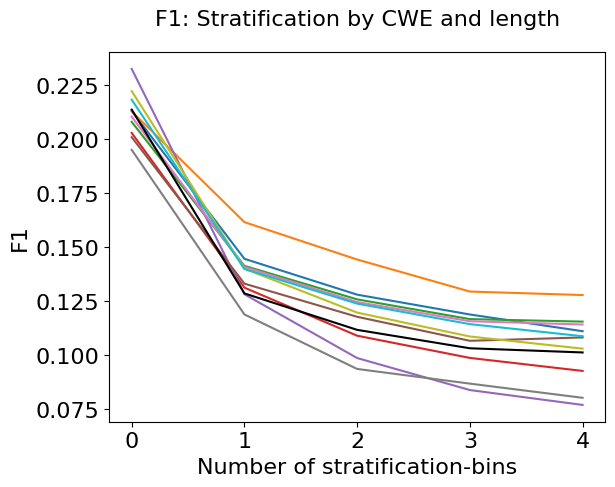

In [12]:
reordered = {} 

for num_bins, cwe_values in best_singles.items():
    for cwe, model_values in cwe_values.items():
        for model, value2 in model_values.items():
            if model not in reordered:
                reordered[model] = {}
            if num_bins not in reordered[model]:
                reordered[model][num_bins] = []
                
            reordered[model][num_bins].append(value2['bacc'])
    for model in reordered.keys():
        for num_bins in reordered[model].keys():
            reordered[model][num_bins] = np.mean(reordered[model][num_bins])
# reduce to model -> perf
for model_key, value in reordered.items():
    
    sort_values_by_their_keys = sorted(value.items(), key=lambda x: x[0])
    only_baccs = [x[1] for x in sort_values_by_their_keys]

    if model_key=='num_nodes':
        color = 'black'
        plt.plot(range(len(only_baccs))[:7], only_baccs[:7], label=model_key, color=color)
    else:
        plt.plot(range(len(only_baccs))[:7], only_baccs[:7], label=model_key)
    print(model_key, only_baccs[-2], 'at step 4')


plt.title('F1: Stratification by CWE and length',y = 1.05)
plt.xlabel('Number of stratification-bins')
plt.ylabel('F1')

# leg = plt.legend(loc='upper right', bbox_to_anchor=(1.83, 1), ncol=1)

# leg.get_frame().set_edgecolor('black')
# # # background white of legend white
# leg.get_frame().set_facecolor('white')
# # # set backgrond non-transparent
# leg.get_frame().set_alpha(1)
# set edge color 
# leg.get_frame().set_linewidth(0.0)
# set x lim
# plt.ylim(0, 0.3)

plt.savefig(f"stratbins_f1_cwe_len_stratified_short_correctbacc.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
len(sizes)

GCN
GIN
RGCN-mean
RGCN-sum
REVEAL
HGPSL
GraphGLOW
GraphGLOW: GIN
GIN: link-prediction
GIN: feature masking + cwe
num_nodes


/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklea

best bacc all models per cwe, take y of best cwe per the models nan
num_nodes best per cwe nan
best single model: GCN 0.5
best comibine 0.6022680621623795
best combine f1 0.15194778913691265
num_nodes combine nan
best single model stratified by cwe and length: num_nodes 0.6166077779281504
best cwe stratif bacc 0.7131815872994175
num_nodes cwe stratif bacc nan
best single model stratified by cwe: GIN: feature masking + cwe 0.6566973450408654


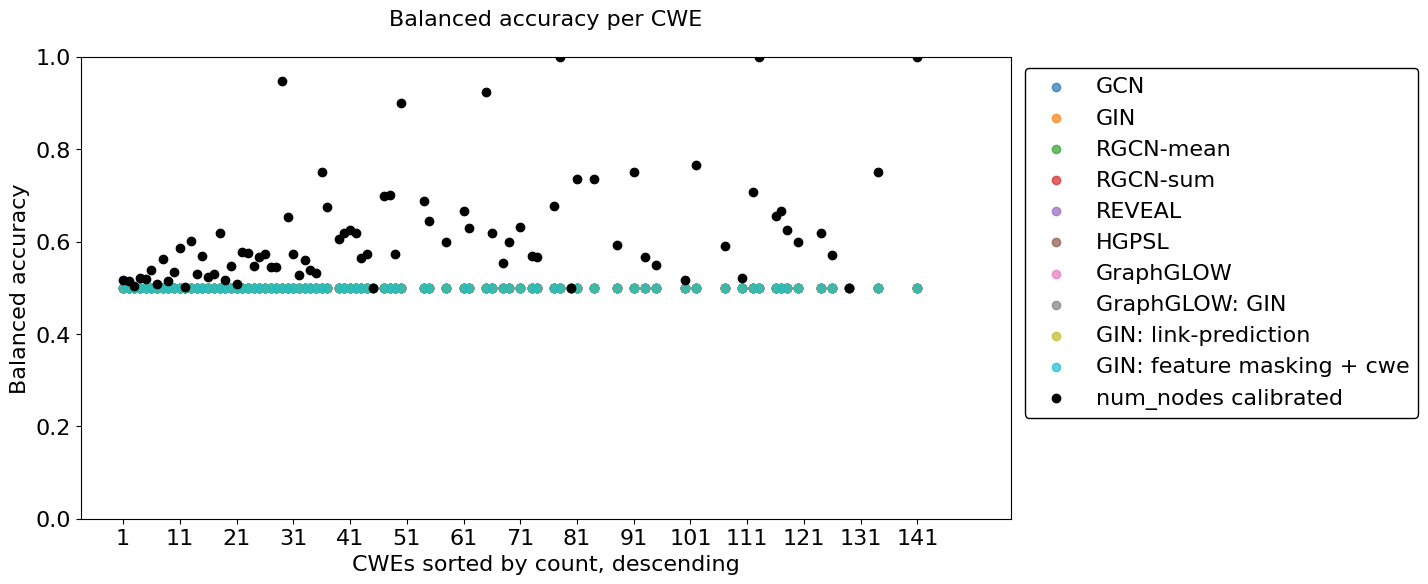

In [12]:
# plot model performances per cwe for all models as scatter plot in one plot
# balanced accuracy
# import len 
from builtins import len

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(12, 6))
models_cwe_perf = {}
for model in model_performances.keys():
    print(model)
    cwe_perf = [-1 for _ in range(150)]
    cwe_y_y_hat = {}
    for cwe in model_performances[model].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        lenx = model_performances[model][cwe]['fileslength']
        nodecounts = model_performances[model][cwe]['logits']
        
        # stratify into 15 bins
        if len(y_true) == sum(y_true) or sum(y_true) == 0:
            continue
        
        # bacc = balanced_accuracy_score(y_true, y_pred)        
        bacc = balanced_accuracy_score(y_true, y_pred)
        
        if model =='num_nodes' or True:
            # determine best threshold
            best_threshold = None
            best_bacc = 0
            if len(y_true) == sum(y_true) or sum(y_true) == 0:
                continue
            
            # min_ = np.min(nodecounts)-1
            # max_ = np.max(nodecounts)+1
            # step = 1a
            # if model != 'num_nodes':
                # determine higher q minus lower q  // len(y_true)
            #    a
            
            # sort node counts
            nodecounts = sorted(nodecounts)
            threholds = list(nodecounts)+[nodecounts[0]-1]
            for threshold in threholds:
                y_pred = [1 if x > threshold else 0 for x in nodecounts]
                b = balanced_accuracy_score(y_true, y_pred)
                if b > best_bacc:
                    best_bacc = b
                    best_threshold = threshold
            
            bacc = best_bacc
        # cwe_perf.append(bacc)
    
        cwe_perf[sorted_cwe_indices.index(cwe)] = bacc
        cwe_y_y_hat[cwe] = (y_true, y_pred)
        
        
    if model=='num_nodes':
        plt.scatter(range(len(cwe_perf)), cwe_perf, label='num_nodes calibrated', alpha=1, c='black')
    else:
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=0.7)
    
    models_cwe_perf[model] = cwe_perf


all_y, all_y_hat = [], []
num_Nodes_y, num_Nodes_y_hat = [], []
bestsingle_y, bestsingle_y_hat = [], []


best_len_cwe_stratif_baccs =[]
num_nodes_len_cwe_stratif_bacc = []
bestsingle_len_cwe_baccs = []

best_cwe_stratif = []
num_nodes_cwe_stratif = []
best_stratif_f1_s=[]

best_singles = {}
for cwe in sorted(model_performances['num_nodes'].keys()):
    best_bacc = 0
    best_stratif_bacc = 0 
    best_normal_stratif_bacc = 0
    best_stratif_f1 = 0
    
    best_y, best_y_hat = [], []
    for model in model_performances.keys():
        
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        lenx = model_performances[model][cwe]['fileslength']
        nodecounts = model_performances[model][cwe]['logits']
        
        normal_bacc = balanced_accuracy_score(y_true, y_pred)
        if len(y_true) == sum(y_true) or sum(y_true) == 0:
            continue
        bacc = normal_bacc
        
        if model =='num_nodes' or True:
            # determine best threshold
            best_threshold = None
            best_bacc = 0
            if len(y_true) == sum(y_true) or sum(y_true) == 0:
                continue
            # min_ = np.min(nodecounts)-1
            # max_ = np.max(nodecounts)+1
            
            # step = 1
            # if model != 'num_nodes':
            #     min_ = -5
            #     max_ = 5
            #     step = 0.1
            nodecounts = sorted(nodecounts)
            threholds = list(nodecounts)+[nodecounts[0]-1] 
            for threshold in threholds:
                y_pred = [1 if x > threshold else 0 for x in nodecounts]
                b = balanced_accuracy_score(y_true, y_pred)
                if b > best_bacc:
                    best_bacc = b
                    best_threshold = threshold
            
            bacc = best_bacc
            
            
            # num_nodes_len_cwe_stratif_bacc.append(bacc)
            # num_Nodes_y += y_true
            # num_Nodes_y_hat += y_pred
            # num_nodes_cwe_stratif.append(bacc)
        # else:
            if bacc > best_bacc:
                best_bacc = bacc
                best_y = y_true
                best_y_hat = y_pred
            
            if bacc>best_stratif_bacc:
                best_stratif_bacc = bacc
                best_stratif_f1 = f1_score(y_true, y_pred)
            
            if normal_bacc>best_normal_stratif_bacc:
                best_normal_stratif_bacc = normal_bacc

            if model not in best_singles:
                best_singles[model] = {'y': y_true, 'y_hat': y_pred, 'bacc': [bacc], 'normal_bacc': [normal_bacc]}

            else:
               
                best_singles[model]['y'] += y_true
                best_singles[model]['y_hat'] += y_pred
                best_singles[model]['bacc'].append(bacc)
                best_singles[model]['normal_bacc'].append(normal_bacc)
                

    
    best_cwe_stratif.append(best_normal_stratif_bacc)
    best_stratif_f1_s.append(best_stratif_f1)
    best_len_cwe_stratif_baccs.append(best_stratif_bacc)
    all_y += best_y
    all_y_hat += best_y_hat


best_singles_baccs = best_singles

# find best single model
# best non stratified
best_bacc = 0
best_model = None
for model in best_singles.keys():
    if balanced_accuracy_score(best_singles[model]['y'], best_singles[model]['y_hat']) > best_bacc:
        best_bacc = balanced_accuracy_score(best_singles[model]['y'], best_singles[model]['y_hat'])
        best_model = model

# best stratified
best_stratif_bacc = 0
best_model_stratif = None
for model in best_singles.keys():
    if np.mean(best_singles[model]['bacc']) > best_stratif_bacc:
        best_stratif_bacc = np.mean(best_singles[model]['bacc'])
        best_model_stratif = model

# best stratified normal:
best_normal_stratif_bacc = 0
best_model_normal_stratif = None
for model in best_singles.keys():
    if np.mean(best_singles[model]['normal_bacc']) > best_normal_stratif_bacc:
        best_normal_stratif_bacc = np.mean(best_singles[model]['normal_bacc'])
        best_model_normal_stratif = model
        

# native performance    
print("best bacc all models per cwe, take y of best cwe per the models", balanced_accuracy_score(all_y, all_y_hat))
print('num_nodes best per cwe', balanced_accuracy_score(num_Nodes_y, num_Nodes_y_hat))
print('best single model:', best_model, best_bacc)

print('best comibine', np.mean(best_len_cwe_stratif_baccs))
print('best combine f1', np.mean(best_stratif_f1_s))
print('num_nodes combine', np.mean(num_nodes_len_cwe_stratif_bacc))
print('best single model stratified by cwe and length:', best_model_stratif, best_stratif_bacc)
# stratified by cwe only
print('best cwe stratif bacc', np.mean(best_cwe_stratif))
print('num_nodes cwe stratif bacc', np.mean(num_nodes_cwe_stratif))
print('best single model stratified by cwe:', best_model_normal_stratif, best_normal_stratif_bacc)

plt.title('Balanced accuracy per CWE', y = 1.05)
plt.ylabel('Balanced accuracy')
plt.xlabel('CWEs sorted by count, descending')
plt.legend()
plt.ylim(0, 1)
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1), ncol=1)
# plt.ylim(0, 1000)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
plt.ylim(0, 1)

# make xticks from 1 to 150 
plt.xticks(range(0, 150, 10))
# labels 1 to 150
plt.xticks(range(0, 150, 10), range(1, 151, 10))

plt.savefig(f"bacc_vs_cwewithpretrain_nostratif.png", dpi=300, bbox_inches='tight')

/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/pyg/lib/p

best bacc all models per cwe, take y of best cwe per the models 0.24715682454870966
num_nodes best per cwe 0.0
best single model: GraphGLOW: GIN 0.24255913086121694
best comibine 0.2816889010567638
best combine f1 0.2816889010567638
num_nodes combine 0.35468528451155235
best single model stratified by cwe and length: REVEAL 0.23653209363140026
best cwe stratif bacc 0.2816889010567638
num_nodes cwe stratif bacc 0.35468528451155235
best single model stratified by cwe: REVEAL 0.23653209363140026


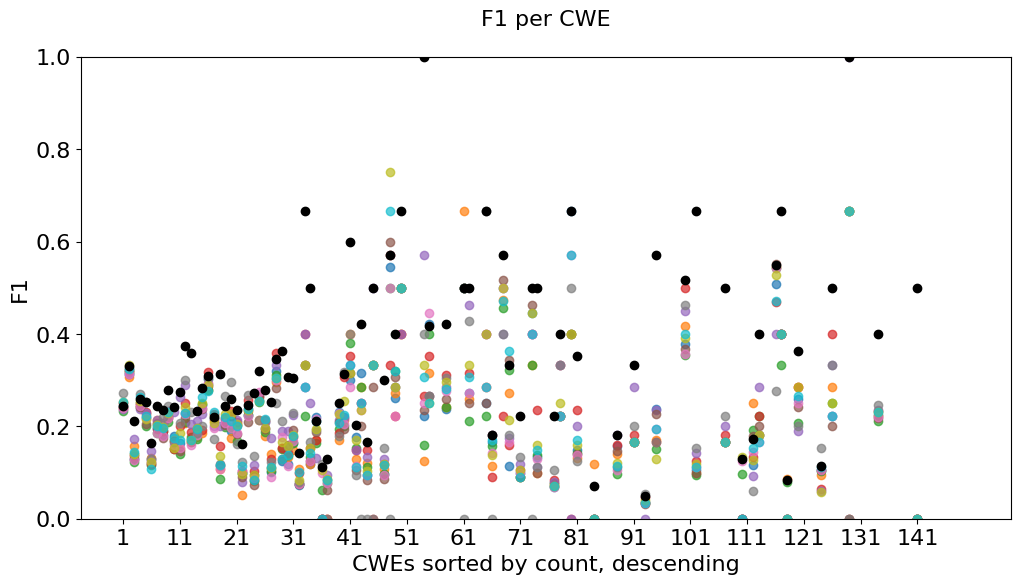

In [24]:
# plot model performances per cwe for all models as scatter plot in one plot
# balanced accuracy
# import len 
from builtins import len

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy
balanced_accuracy_score=f1_score

font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(12, 6))
models_cwe_perf = {}
for model in model_performances.keys():
    cwe_perf = [-1 for _ in range(150)]
    cwe_y_y_hat = {}
    for cwe in model_performances[model].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        lenx = model_performances[model][cwe]['fileslength']
        nodecounts = model_performances[model][cwe]['logits']
        
        # stratify into 15 bins
        if len(y_true) == sum(y_true) or sum(y_true) == 0:
            continue
        
        # bacc = balanced_accuracy_score(y_true, y_pred)        
        bacc = balanced_accuracy_score(y_true, y_pred)
        
        if model =='num_nodes':
            # determine best threshold
            best_threshold = None
            best_bacc = 0
            if len(y_true) == sum(y_true) or sum(y_true) == 0:
                continue
            
            for threshold in range(min(nodecounts)-1, max(nodecounts)+1):
                y_pred = [1 if x > threshold else 0 for x in nodecounts]
                b = balanced_accuracy_score(y_true, y_pred)
                if b > best_bacc:
                    best_bacc = b
                    best_threshold = threshold
            
            bacc = best_bacc
        # cwe_perf.append(bacc)
    
        cwe_perf[sorted_cwe_indices.index(cwe)] = bacc
        cwe_y_y_hat[cwe] = (y_true, y_pred)
        
        
    if model=='num_nodes':
        plt.scatter(range(len(cwe_perf)), cwe_perf, label='num_nodes calibrated', alpha=1, c='black')
    else:
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=0.7)
    
    models_cwe_perf[model] = cwe_perf


all_y, all_y_hat = [], []
num_Nodes_y, num_Nodes_y_hat = [], []
bestsingle_y, bestsingle_y_hat = [], []


best_len_cwe_stratif_baccs =[]
num_nodes_len_cwe_stratif_bacc = []
bestsingle_len_cwe_baccs = []

best_cwe_stratif = []
num_nodes_cwe_stratif = []
best_stratif_f1_s=[]

best_singles = {}
for cwe in sorted(model_performances['num_nodes'].keys()):
    best_bacc = 0
    best_stratif_bacc = 0 
    best_normal_stratif_bacc = 0
    best_stratif_f1 = 0
    
    best_y, best_y_hat = [], []
    for model in model_performances.keys():
        
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        lenx = model_performances[model][cwe]['fileslength']
        nodecounts = model_performances[model][cwe]['logits']
        
        normal_bacc = balanced_accuracy_score(y_true, y_pred)
        if len(y_true) == sum(y_true) or sum(y_true) == 0:
            continue
        bacc = normal_bacc
        
        if model =='num_nodes':
            # determine best threshold
            best_threshold = None
            best_bacc = 0
            if len(y_true) == sum(y_true) or sum(y_true) == 0:
                continue
            
            for threshold in range(min(nodecounts)-1, max(nodecounts)+1):
                y_pred = [1 if x > threshold else 0 for x in nodecounts]
                b = balanced_accuracy_score(y_true, y_pred)
                if b > best_bacc:
                    best_bacc = b
                    best_threshold = threshold
            
            bacc = best_bacc
            
            
            num_nodes_len_cwe_stratif_bacc.append(bacc)
            num_Nodes_y += y_true
            num_Nodes_y_hat += y_pred
            num_nodes_cwe_stratif.append(bacc)
        else:
            if bacc > best_bacc:
                best_bacc = bacc
                best_y = y_true
                best_y_hat = y_pred
            
            if bacc>best_stratif_bacc:
                best_stratif_bacc = bacc
                best_stratif_f1 = f1_score(y_true, y_pred)
            
            if normal_bacc>best_normal_stratif_bacc:
                best_normal_stratif_bacc = normal_bacc

            if model not in best_singles:
                best_singles[model] = {'y': y_true, 'y_hat': y_pred, 'bacc': [bacc], 'normal_bacc': [normal_bacc]}

            else:
               
                best_singles[model]['y'] += y_true
                best_singles[model]['y_hat'] += y_pred
                best_singles[model]['bacc'].append(bacc)
                best_singles[model]['normal_bacc'].append(normal_bacc)
                

    
    best_cwe_stratif.append(best_normal_stratif_bacc)
    best_stratif_f1_s.append(best_stratif_f1)
    best_len_cwe_stratif_baccs.append(best_stratif_bacc)
    all_y += best_y
    all_y_hat += best_y_hat


best_singles_f1s = best_singles

# find best single model
# best non stratified
best_bacc = 0
best_model = None
for model in best_singles.keys():
    if balanced_accuracy_score(best_singles[model]['y'], best_singles[model]['y_hat']) > best_bacc:
        best_bacc = balanced_accuracy_score(best_singles[model]['y'], best_singles[model]['y_hat'])
        best_model = model

# best stratified
best_stratif_bacc = 0
best_model_stratif = None
for model in best_singles.keys():
    if np.mean(best_singles[model]['bacc']) > best_stratif_bacc:
        best_stratif_bacc = np.mean(best_singles[model]['bacc'])
        best_model_stratif = model

# best stratified normal:
best_normal_stratif_bacc = 0
best_model_normal_stratif = None
for model in best_singles.keys():
    if np.mean(best_singles[model]['normal_bacc']) > best_normal_stratif_bacc:
        best_normal_stratif_bacc = np.mean(best_singles[model]['normal_bacc'])
        best_model_normal_stratif = model
        

# native performance    
print("best bacc all models per cwe, take y of best cwe per the models", balanced_accuracy_score(all_y, all_y_hat))
print('num_nodes best per cwe', balanced_accuracy_score(num_Nodes_y, num_Nodes_y_hat))
print('best single model:', best_model, best_bacc)

print('best comibine', np.mean(best_len_cwe_stratif_baccs))
print('best combine f1', np.mean(best_stratif_f1_s))
print('num_nodes combine', np.mean(num_nodes_len_cwe_stratif_bacc))
print('best single model stratified by cwe and length:', best_model_stratif, best_stratif_bacc)
# stratified by cwe only
print('best cwe stratif bacc', np.mean(best_cwe_stratif))
print('num_nodes cwe stratif bacc', np.mean(num_nodes_cwe_stratif))
print('best single model stratified by cwe:', best_model_normal_stratif, best_normal_stratif_bacc)

plt.title('F1 per CWE', y = 1.05)
plt.ylabel('F1')
plt.xlabel('CWEs sorted by count, descending')
# plt.legend()
plt.ylim(0, 1)
# leg = plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1), ncol=1)
# # plt.ylim(0, 1000)
# leg.get_frame().set_edgecolor('black')
# # # background white of legend white
# leg.get_frame().set_facecolor('white')
# # # set backgrond non-transparent
# leg.get_frame().set_alpha(1)
# plt.ylim(0, 1)

# make xticks from 1 to 150 
plt.xticks(range(0, 150, 10))
# labels 1 to 150
plt.xticks(range(0, 150, 10), range(1, 151, 10))

plt.savefig(f"f1_vs_cwewithpretrain_nostratif.png", dpi=300, bbox_inches='tight')


In [27]:
best_singles_baccs.keys()

dict_keys(['GCN', 'GIN', 'RGCN-mean', 'RGCN-sum', 'REVEAL', 'HGPSL', 'GraphGLOW', 'GraphGLOW: GIN', 'GIN: link-prediction', 'GIN: feature masking + cwe'])

In [29]:
len(bacc)

84

In [30]:
len(cwes)

86

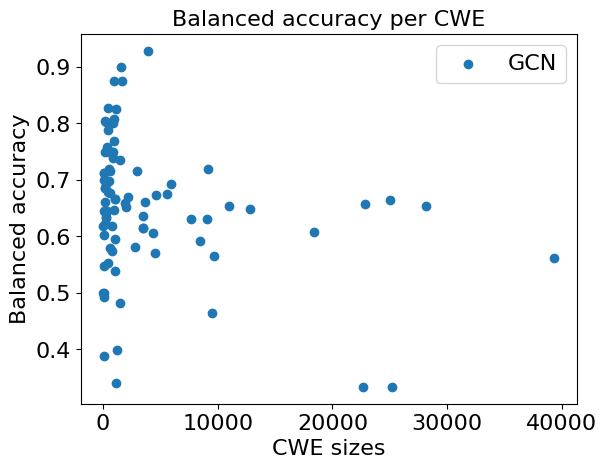

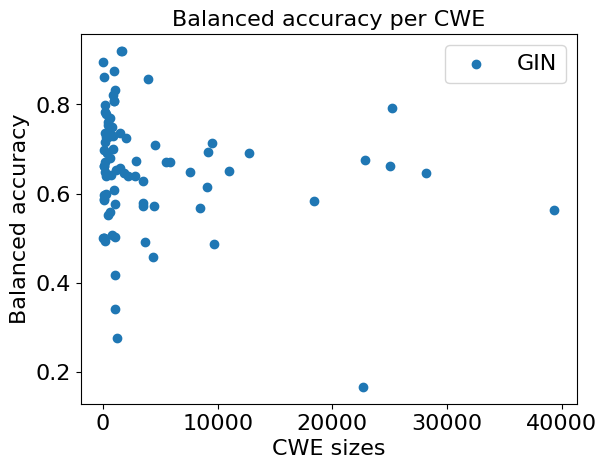

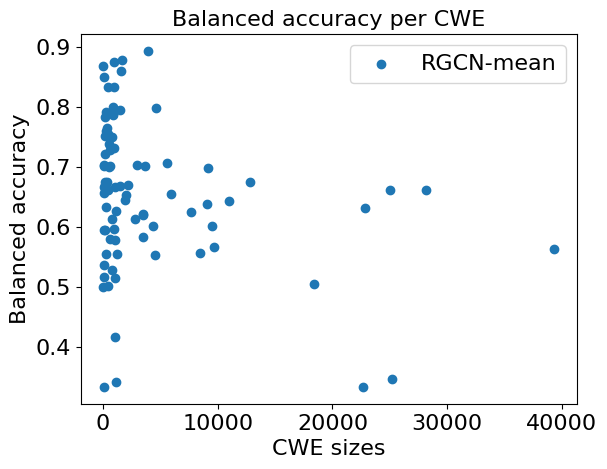

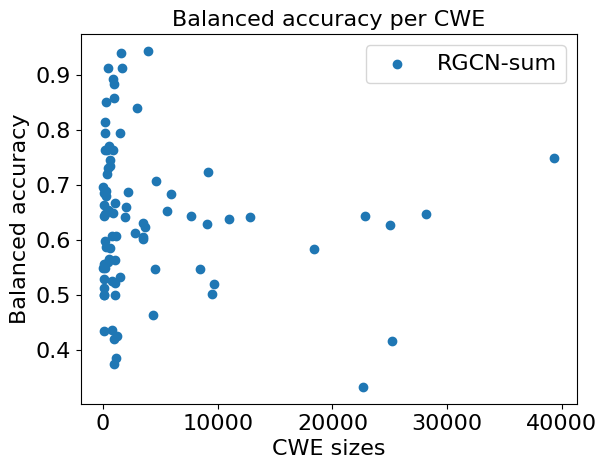

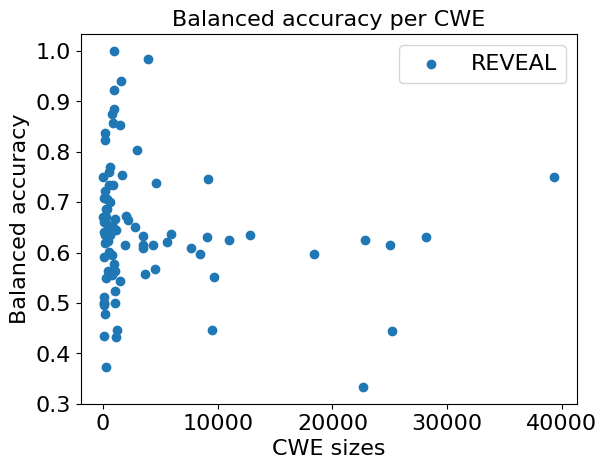

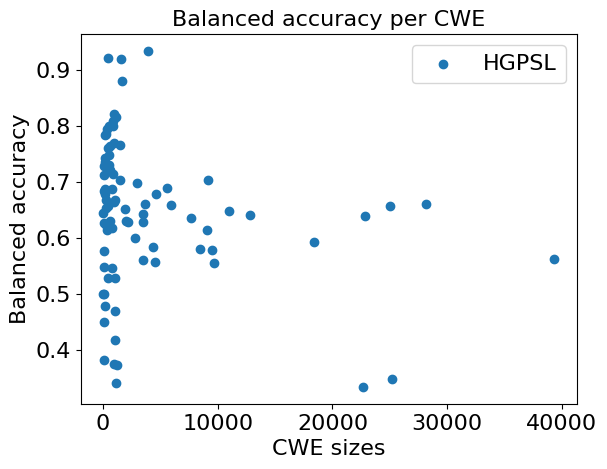

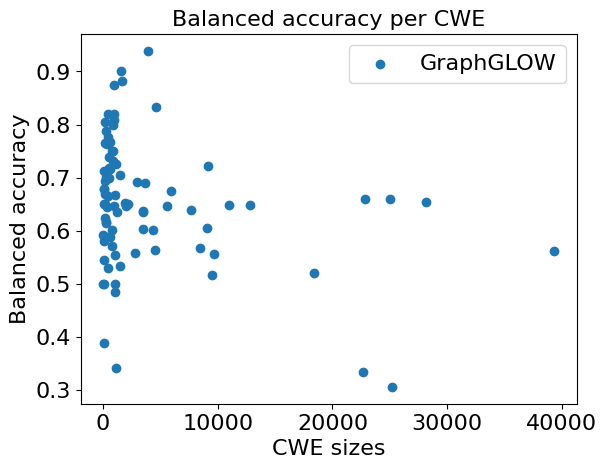

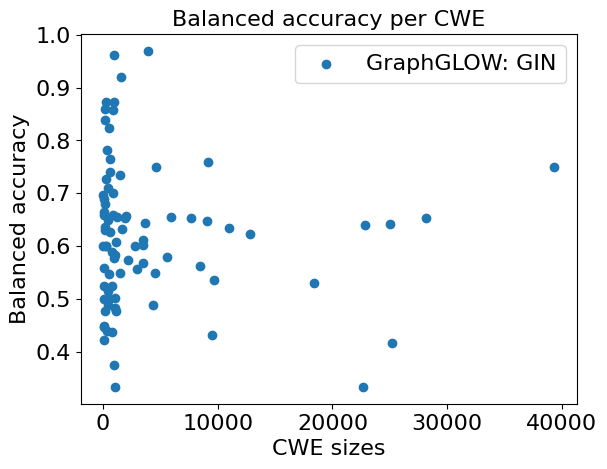

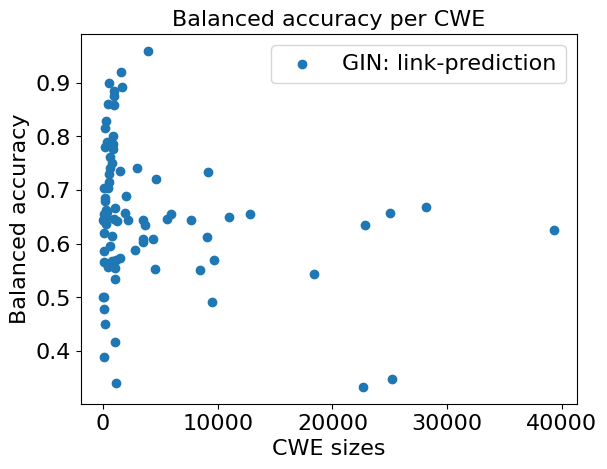

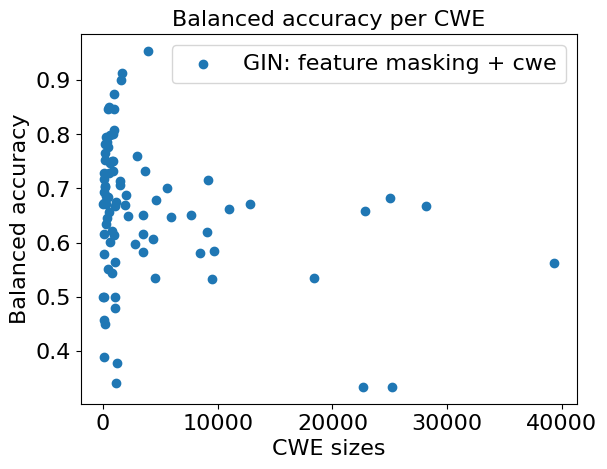

In [31]:
for model, values in best_singles_baccs.items():
    if model == 'num_nodes':
        continue 
    
    bacc = values['bacc']
    cwes = sorted(model_performances['num_nodes'].keys())[:-2]
    cwe_sizes = [cwe_counts[cwe] for cwe in cwes]
    # num_Nodesbacc = best_singles_baccs['num_nodes']['bacc']
    # diff = [b - a for a, b in zip(bacc, num_Nodesbacc)]
    diff = bacc
    
    # scatter plot
    plt.scatter(cwe_sizes, diff, label=model)
    plt.title('Balanced accuracy per CWE')
    plt.xlabel('CWE sizes')
    plt.ylabel('Balanced accuracy')
    plt.legend()
    plt.show()
    
    

In [ ]:
for model, values in best_singles_f1s.items():
    if model == 'num_nodes':
        continue 
    
    f1s = values['bacc']
    cwes = sorted(model_performances['num_nodes'].keys())
    cwe_sizes = [cwe_counts[cwe] for cwe in cwes]
    num_Nodesf1 = best_singles_f1s['num_nodes']['bacc']
    diff = [b - a for a, b in zip(f1s, num_Nodesf1)]
    
    # scatter plot
    plt.scatter(cwe_sizes, diff, label=model)
    plt.title('F1 per CWE')
    plt.xlabel('CWE sizes')
    plt.ylabel('F1')
    plt.legend()
    plt.show()

best bacc all models per cwe 0.21343668218231215
num_nodes best per cwe 0.21172194457064972
best single model: GraphGLOW: GIN 0.23589711729622267
best stratified cwe and length bacc 0.1599087857338577
num_nodes len cwe stratif bacc 0.10312327399209521
best single model stratified by cwe and length: GIN 0.12942671053430488
best cwe stratif bacc 0.2845737778574319
num_nodes cwe stratif bacc 0.10312327399209521
best single model stratified by cwe: REVEAL 0.2321473792005826


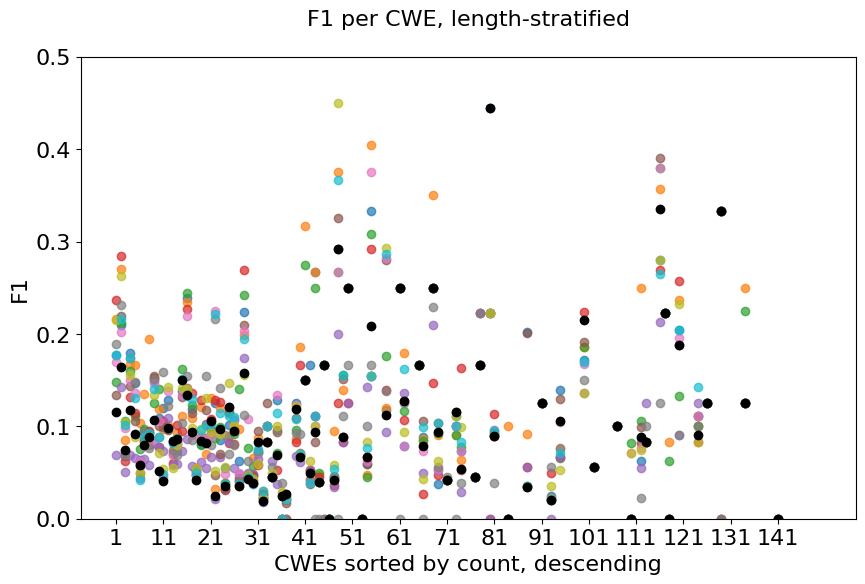

In [33]:
# plot model performances per cwe for all models as scatter plot in one plot
# balanced accuracy
# import len 
from builtins import len

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy
balanced_accuracy_score = f1_score

font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(10, 6))
models_cwe_perf = {}
for model in model_performances.keys():
    cwe_perf = [-1 for _ in range(150)]
    cwe_y_y_hat = {}
    for cwe in model_performances[model].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        lenx = model_performances[model][cwe]['fileslength']
        
        # stratify into 15 bins
       
        num_bins = 4
        
        
        
        bins = [[] for _ in range(num_bins)]
        
        # sort files by length
        sorted_files = sorted(zip(lenx, y_true, y_pred), key=lambda x: x[0])
        len_files = len(sorted_files)
        current_bin = 0
        for file in sorted_files:
            bins[current_bin].append(file)
            if len(bins[current_bin]) >= len_files / num_bins:
                current_bin += 1
                
        # calculate balanced accuracy per bin
        bacc_per_bin = []
        for bin in bins:
            y_true_bin = [x[1] for x in bin]
            y_pred_bin = [x[2] for x in bin]
            if len(y_true_bin) == 0:
                continue
            bacc = balanced_accuracy_score(y_true_bin, y_pred_bin)
            bacc_per_bin.append(bacc)
        
        bacc = np.mean(bacc_per_bin)
        
        # bacc = balanced_accuracy_score(y_true, y_pred)
        # cwe_perf.append(bacc)
        if sorted_cwe_indices.index(cwe)>149:
            continue
        cwe_perf[sorted_cwe_indices.index(cwe)] = bacc
        cwe_y_y_hat[cwe] = (y_true, y_pred)
        
        
    if model=='num_nodes':
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=1, c='black')
    else:
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=0.7)
    
    models_cwe_perf[model] = cwe_perf


all_y, all_y_hat = [], []
num_Nodes_y, num_Nodes_y_hat = [], []
bestsingle_y, bestsingle_y_hat = [], []


best_len_cwe_stratif_baccs =[]
num_nodes_len_cwe_stratif_bacc = []
bestsingle_len_cwe_baccs = []

best_cwe_stratif = []
num_nodes_cwe_stratif = []


best_singles = {}
for cwe in model_performances[model].keys():
    best_bacc = 0
    best_stratif_bacc = 0 
    best_normal_stratif_bacc = 0
    
    best_y, best_y_hat = [], []
    for model in model_performances.keys():
        
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        lenx = model_performances[model][cwe]['fileslength']
        
        # stratify into 15 bins
        num_bins = 4
        bins = [[] for _ in range(num_bins)]
        
        # sort files by length
        sorted_files = sorted(zip(lenx, y_true, y_pred), key=lambda x: x[0])
        len_files = len(sorted_files)
        current_bin = 0
        for file in sorted_files:
            bins[current_bin].append(file)
            if len(bins[current_bin]) >= len_files / num_bins:
                current_bin += 1
                
        # calculate balanced accuracy per bin
        bacc_per_bin = []
        for bin in bins:
            y_true_bin = [x[1] for x in bin]
            y_pred_bin = [x[2] for x in bin]
            if len(y_true_bin) == 0:
                continue
            bacc = balanced_accuracy_score(y_true_bin, y_pred_bin)
            bacc_per_bin.append(bacc)
        
        bacc = np.mean(bacc_per_bin)
        normal_bacc = balanced_accuracy_score(y_true, y_pred)
        
        if model =='num_nodes':
            num_nodes_len_cwe_stratif_bacc.append(bacc)
            num_Nodes_y += y_true
            num_Nodes_y_hat += y_pred
            num_nodes_cwe_stratif.append(bacc)
        else:
            if bacc > best_bacc:
                best_bacc = bacc
                best_y = y_true
                best_y_hat = y_pred
            
            if bacc>best_stratif_bacc:
                best_stratif_bacc = bacc
            
            if normal_bacc>best_normal_stratif_bacc:
                best_normal_stratif_bacc = normal_bacc

            if model not in best_singles:
                best_singles[model] = {'y': y_true, 'y_hat': y_pred, 'bacc': [bacc], 'normal_bacc': [normal_bacc]}

            else:
               
                best_singles[model]['y'] += y_true
                best_singles[model]['y_hat'] += y_pred
                best_singles[model]['bacc'].append(bacc)
                best_singles[model]['normal_bacc'].append(normal_bacc)
                

    
    best_cwe_stratif.append(best_normal_stratif_bacc)
    
    best_len_cwe_stratif_baccs.append(best_stratif_bacc)
    all_y += best_y
    all_y_hat += best_y_hat

# find best single model
# best non stratified
best_bacc = 0
best_model = None
for model in best_singles.keys():
    if balanced_accuracy_score(best_singles[model]['y'], best_singles[model]['y_hat']) > best_bacc:
        best_bacc = balanced_accuracy_score(best_singles[model]['y'], best_singles[model]['y_hat'])
        best_model = model

# best stratified
best_stratif_bacc = 0
best_model_stratif = None
for model in best_singles.keys():
    if np.mean(best_singles[model]['bacc']) > best_stratif_bacc:
        best_stratif_bacc = np.mean(best_singles[model]['bacc'])
        best_model_stratif = model

# best stratified normal:
best_normal_stratif_bacc = 0
best_model_normal_stratif = None
for model in best_singles.keys():
    if np.mean(best_singles[model]['normal_bacc']) > best_normal_stratif_bacc:
        best_normal_stratif_bacc = np.mean(best_singles[model]['normal_bacc'])
        best_model_normal_stratif = model
        

# native performance    
print("best bacc all models per cwe", balanced_accuracy_score(all_y, all_y_hat))
print('num_nodes best per cwe', balanced_accuracy_score(num_Nodes_y, num_Nodes_y_hat))
print('best single model:', best_model, best_bacc)

# stratified by length and cwe
print('best stratified cwe and length bacc', np.mean(best_len_cwe_stratif_baccs))
print('num_nodes len cwe stratif bacc', np.mean(num_nodes_len_cwe_stratif_bacc))
print('best single model stratified by cwe and length:', best_model_stratif, best_stratif_bacc)
# stratified by cwe only
print('best cwe stratif bacc', np.mean(best_cwe_stratif))
print('num_nodes cwe stratif bacc', np.mean(num_nodes_cwe_stratif))
print('best single model stratified by cwe:', best_model_normal_stratif, best_normal_stratif_bacc)

plt.title('F1 per CWE, length-stratified', y = 1.05)
plt.ylabel('F1')
plt.xlabel('CWEs sorted by count, descending')
# plt.legend()
plt.ylim(0, 1)
# leg = plt.legend(loc='upper right', bbox_to_anchor=(1.53, 1), ncol=1)
# # plt.ylim(0, 1000)
# leg.get_frame().set_edgecolor('black')
# # # background white of legend white
# leg.get_frame().set_facecolor('white')
# # # set backgrond non-transparent
# leg.get_frame().set_alpha(1)
plt.ylim(0, 0.5)

# make xticks from 1 to 150 
plt.xticks(range(0, 150, 10))
# labels 1 to 150
plt.xticks(range(0, 150, 10), range(1, 151, 10))

plt.savefig(f"f1_vs_cwe_withpretrain_stratified_numbins4_GGGIN.png", dpi=300, bbox_inches='tight')


min 20.5 max 484.27272727272725 mean 139.0099454787987 median 123.41567460317461
86


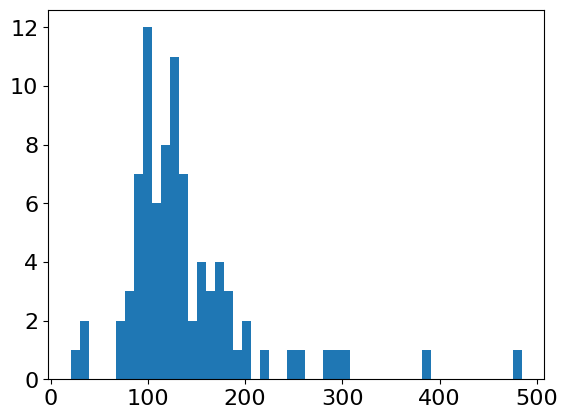

In [37]:
cwe_len = []
for cwe in model_performances[model].keys():
    len_cwe_files = model_performances[model][cwe]['fileslength']
    cwe_len.append(np.mean(len_cwe_files))
    
# hist but sort before
plt.hist(sorted(cwe_len), bins=50)
print('min', min(cwe_len), 'max', max(cwe_len), 'mean', np.mean(cwe_len), 'median', np.median(cwe_len))
print(len(cwe_len))

/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in '

best bacc all models 0.6428574971808396


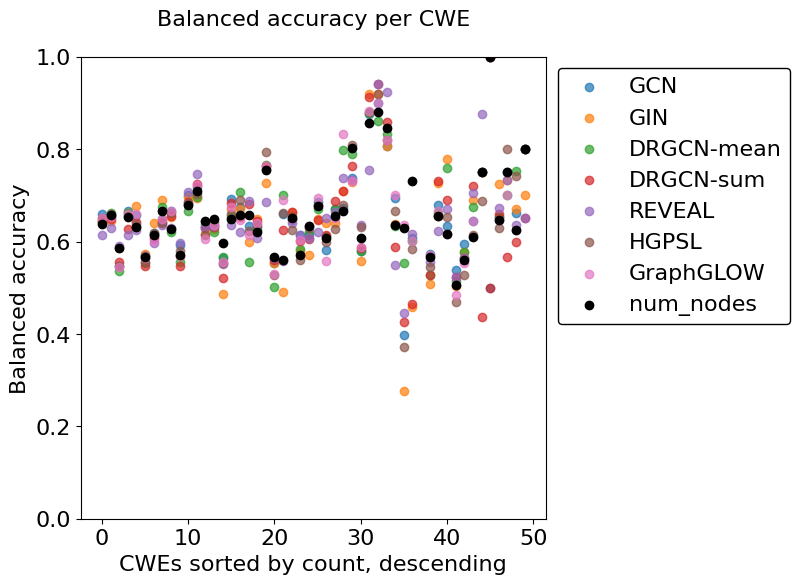

In [83]:
# plot model performances per cwe for all models as scatter plot in one plot
# balanced accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(6, 6))
models_cwe_perf = {}
for model in model_performances.keys():
    cwe_perf = [-1 for _ in range(50)]
    cwe_y_y_hat = {}
    for cwe in model_performances[model].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        bacc = balanced_accuracy_score(y_true, y_pred)
        # cwe_perf.append(bacc)
        if sorted_cwe_indices.index(cwe)>49:
            continue
        cwe_perf[sorted_cwe_indices.index(cwe)] = bacc
        cwe_y_y_hat[cwe] = (y_true, y_pred)
        
        
    if model=='num_nodes':
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=1, c='black')
    else:
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=0.7)
    
    models_cwe_perf[model] = cwe_perf

    # rather plot accumulated performance
    # plt.plot(range(len(cwe_perf)), np.cumsum(cwe_perf), label=model)

# max possible performance
max_bacc = 0 
bacc_num_nodes = 0
all_y, all_y_hat = [], []
for cwe in cwe_y_y_hat.keys():
    best_bacc = 0
    best_y, best_y_hat = [], []
    for model, cwe_perf in models_cwe_perf.items():
        if model == 'num_nodes':
            continue
        y, y_hat = cwe_y_y_hat[cwe]
        bacc = balanced_accuracy_score(y, y_hat)
        if bacc > best_bacc:
            best_bacc = bacc
            best_y = y
            best_y_hat = y_hat
            
    # print(f"best bacc {cwe}", best_bacc)  
    all_y += best_y
    all_y_hat += best_y_hat
    
print("best bacc all models", balanced_accuracy_score(all_y, all_y_hat))
            
plt.title('Balanced accuracy per CWE', y = 1.05)
plt.ylabel('Balanced accuracy')
plt.xlabel('CWEs sorted by count, descending')
plt.legend()
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1), ncol=1)
# plt.ylim(0, 1000)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
plt.ylim(0, 1)

# make xticks from 1 to 150 
plt.xticks(range(0, 51, 10))
plt.savefig(f"bacc_vs_cwe.png", dpi=300, bbox_inches='tight')


/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/pyg/lib/p

([<matplotlib.axis.XTick at 0x7fa0674c9010>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140'),
  Text(150, 0, '150')])

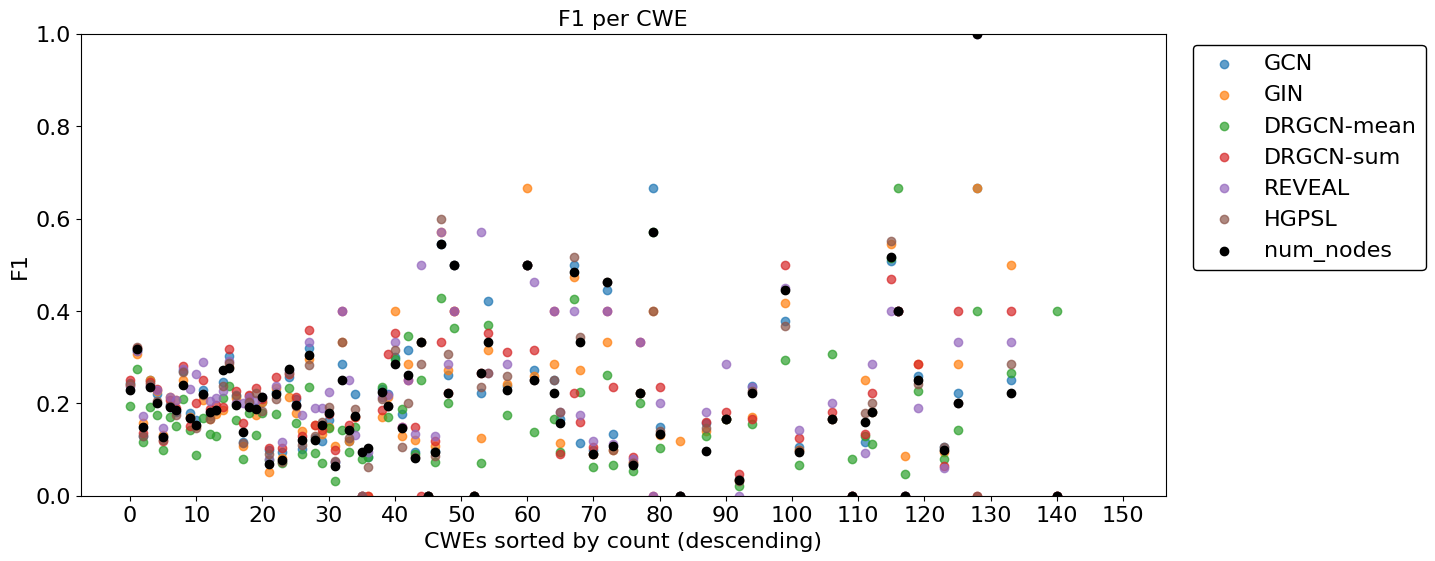

In [97]:
# plot model performances per cwe for all models as scatter plot in one plot
# balanced accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(14, 6))
for model in model_performances.keys():
    cwe_perf = [-1 for _ in range(len(sorted_cwes))]
    for cwe in model_performances[model].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        bacc = f1_score(y_true, y_pred)
        # cwe_perf.append(bacc)
        cwe_perf[sorted_cwe_indices.index(cwe)] = bacc
    if model=='num_nodes':
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=1, c='black')
    else:
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=0.7)
    
    # rather plot accumulated performance
    # plt.plot(range(len(cwe_perf)), np.cumsum(cwe_perf), label=model)
            
plt.title('F1 per CWE')
plt.ylabel('F1')
plt.xlabel('CWEs sorted by count (descending)')
plt.legend()
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
# plt.ylim(0, 1000)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
plt.savefig(f"f1_vs_cwe.png", dpi=300, bbox_inches='tight')
plt.ylim(0, 1)

# make xticks from 1 to 150 
plt.xticks(range(0, 151, 10))

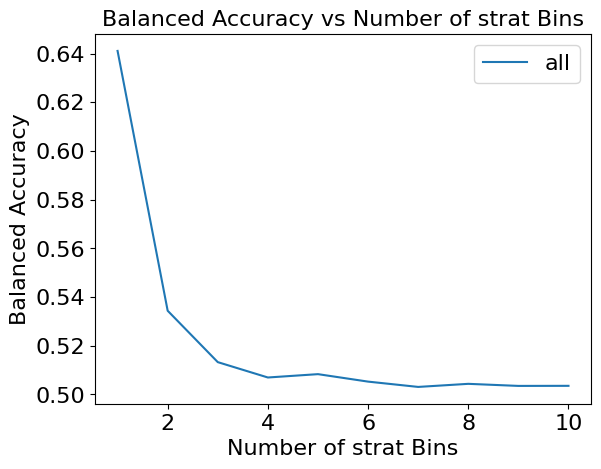

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

num_bins_range = range(1, 11)  # Adapt this range as per your needs

# for model in datadict.keys():
perf_vs_bins = []

for num_bins in num_bins_range:
    # Divide files into num_bins based on graph size
    bins = [[] for _ in range(num_bins)]
    sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])
    len_files = len(sorted_sizes)

    current_bin = 0
    for file in sorted_sizes:
        # Fill bins from the bottom
        bins[current_bin].append(file[0])
        if len(bins[current_bin]) >= len_files / num_bins:
            current_bin += 1

    # Calculate model performance on each bin and average
    model_performance = []
    for bin in bins:
        y_true = []
        y_pred = []
        for file in bin:
            yt = datadict[model][file]['y']
            ypred = []
            for model in datadict.keys():
                # yt = datadict[model][file]['y']
                ypred = datadict[model][file]['y_hat']
                
            y_true.append(yt)
            y_pred.append(np.median(ypred))
            # y_true.append(datadict[model][file]['y'])
            # y_pred.append(datadict[model][file]['y_hat'])
        model_performance.append(balanced_accuracy_score(y_true, y_pred))
    
    mean_perf = np.mean(model_performance)
    perf_vs_bins.append(mean_perf)

# Plot balanced accuracy as a function of num_bins
plt.plot(num_bins_range, perf_vs_bins, label='all')

plt.title('Balanced Accuracy vs Number of strat Bins')
plt.xlabel('Number of strat Bins')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.show()

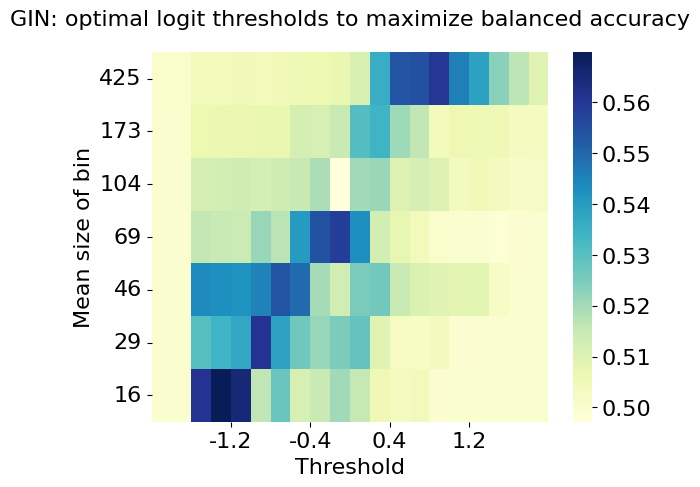

In [59]:
import seaborn as sns
import pandas as pd
# Bin the logits first into different thresholds: 
# Say, thresholds are from 0 to 1 with step 0.2

thresholds = np.arange(-2, 2, 0.2)

for model in datadict.keys():
    if model != "GIN":
        continue
    results = []
    
    num_bins = 7
    bins = [[] for _ in range(num_bins)]
    binsizes = [[] for _ in range(num_bins)]
    sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])

    len_files = len(sorted_sizes)
    current_bin = 0
    for file in sorted_sizes:
        # fill bins from the bottom
        bins[current_bin].append(file[0])
        binsizes[current_bin].append(file[1])
        if len(bins[current_bin]) >= len_files / num_bins:
            current_bin += 1
            
    # plot performance of each model on each bin
    bin_average_size = [np.mean(bin) for bin in binsizes]
    for th in thresholds:
        
        for i, (bin, binavgsize) in enumerate(zip(bins,bin_average_size)):
            y_true = []
            y_pred = []
            for file in bin:
                logits = datadict[model][file]['logits']
                y_true.append(datadict[model][file]['y'])
                y_pred.append(1 if logits > th else 0)
                
            bal_acc = balanced_accuracy_score(y_true, y_pred)
            results.append(["", round(th,4), round(binavgsize,4) , round(bal_acc,5)])
        
    # gcn_thresholds = [30, 40, 110,200, 10000]
    # best_gcn_thresholds = [-1.4, -0.8,-0.4, 0.2,0.6]
    # currbin = 0
    # y_true, y_hat = [], []
    # for file in sorted_sizes:
    #     if file[1] < gcn_thresholds[currbin]:
    #         y_true.append(datadict[model][file[0]]['y'])
    #         y_hat.append(1 if datadict[model][file[0]]['logits'] > best_gcn_thresholds[currbin] else 0)
    #     else:
    #         currbin += 1
    #         y_true.append(datadict[model][file[0]]['y'])
    #         y_hat.append(1 if datadict[model][file[0]]['logits'] > best_gcn_thresholds[currbin] else 0)
            
    # print(model, balanced_accuracy_score(y_true, y_hat))
    
    # Create DataFrame
    results_df = pd.DataFrame(results, columns=['GIN', 'Threshold', 'Mean size of bin', 'Balanced accuracy'])

    pivot = pd.pivot_table(results_df, values='Balanced accuracy', 
                        index=['Mean size of bin'], 
                        columns=['Threshold'])

    # Generate Heatmap
    # plt.figure(figsize=(10, 10))
    sns.heatmap(pivot, cmap="YlGnBu", fmt=".2f")
    plt.title('GIN: optimal logit thresholds to maximize balanced accuracy', y = 1.05)
    # flip y axis
    plt.gca().invert_yaxis()
    # set yticks
    # sns rotate xticks
    plt.xticks(rotation=0)
    plt.yticks(rotation=0) 
    # plt.xticks([])
    # show only ever second x tick and round to 2 decimals
    plt.xticks([ x for x in range(0, len(thresholds), 4)[1:]], [round(th,4) for th in thresholds[::4]][1:])
    # round y ticks to 0 decimals
    plt.yticks([x+0.5 for x in range(0, len(bin_average_size))] , [str(round(x,0))[:-2] for x in bin_average_size], y=0.8)
    # move y ticks to the top a bit
    plt.savefig(f"GIN_thresholds.png", dpi=300, bbox_inches='tight')
    
    plt.show()
    
    
    
    break

In [50]:
thresholds

array([-2.0000000e+00, -1.8000000e+00, -1.6000000e+00, -1.4000000e+00,
       -1.2000000e+00, -1.0000000e+00, -8.0000000e-01, -6.0000000e-01,
       -4.0000000e-01, -2.0000000e-01, -4.4408921e-16,  2.0000000e-01,
        4.0000000e-01,  6.0000000e-01,  8.0000000e-01,  1.0000000e+00,
        1.2000000e+00,  1.4000000e+00,  1.6000000e+00,  1.8000000e+00])

In [78]:
# GIN vs. sizes classifier
import sklearn.metrics as metrics

model = 'RGCN-mean'
y_true = []
y_pred = []
for file in sizes.keys():
    y_true.append(datadict[model][file]['y'])
    y_pred.append(datadict[model][file]['logits'])
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, label=model)

y_true, y_pred = [], []
for file in sizes.keys():
    y_true.append(datadict[model][file]['y'])
    y_pred.append(sizes[file])

fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, label='num_nodes')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
leg = plt.legend(loc='lower right', ncol=1)
# plt.ylim(0, 1000)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
plt.show()

# precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

y_true = []
y_pred = []
for file in sizes.keys():
    y_true.append(datadict[model][file]['y'])
    y_pred.append(datadict[model][file]['logits'])
precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.plot(recall, precision, label=model)

y_true, y_pred = [], []
for file in sizes.keys():
    y_true.append(datadict[model][file]['y'])
    y_pred.append(sizes[file])

precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.plot(recall, precision, label='num_nodes')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
# plt.legend()
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
# plt.ylim(0, 1000)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
plt.show()

KeyError: 'RGCN-mean'

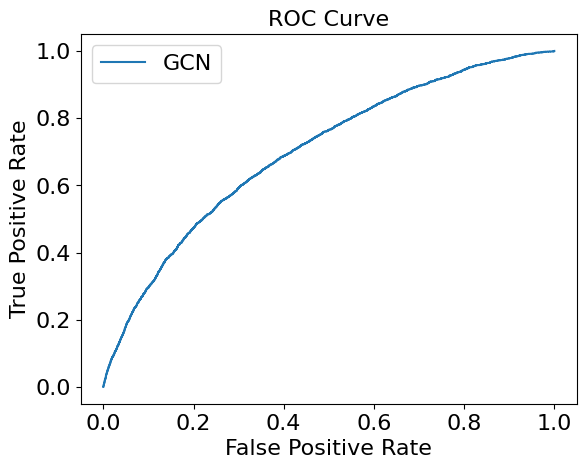

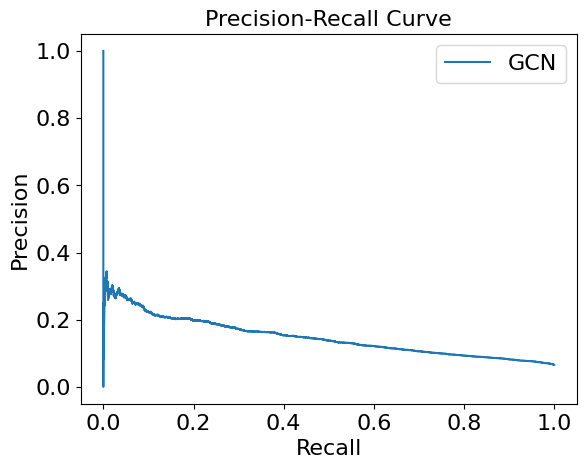

AUC for GCN: 0.7002836514576302
Precision-Recall AUC for GCN: 0.1472717465229874
F1 Score for GCN: 0.21796093377798953
Accuracy for GCN: 0.8491268382352941
Confusion Matrix for GCN:
[[36039  4607]
 [ 1959   915]]



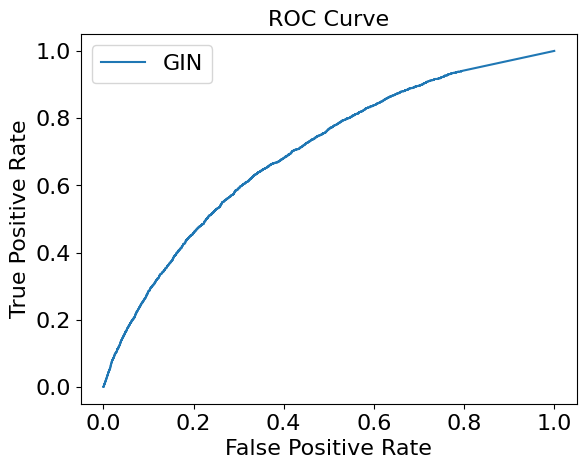

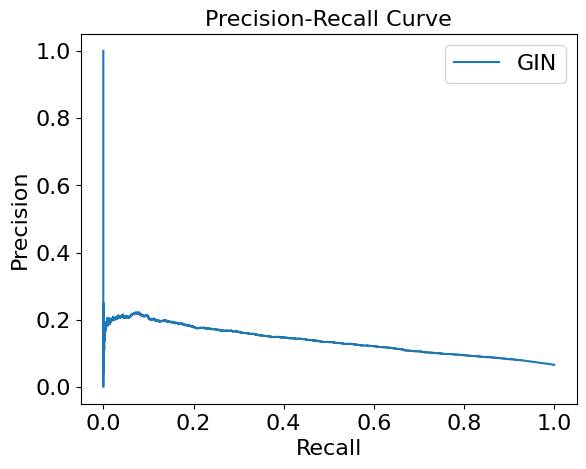

AUC for GIN: 0.6959141313507111
Precision-Recall AUC for GIN: 0.13662310311053788
F1 Score for GIN: 0.20613627307743393
Accuracy for GIN: 0.8626608455882353
Confusion Matrix for GIN:
[[36767  3879]
 [ 2098   776]]



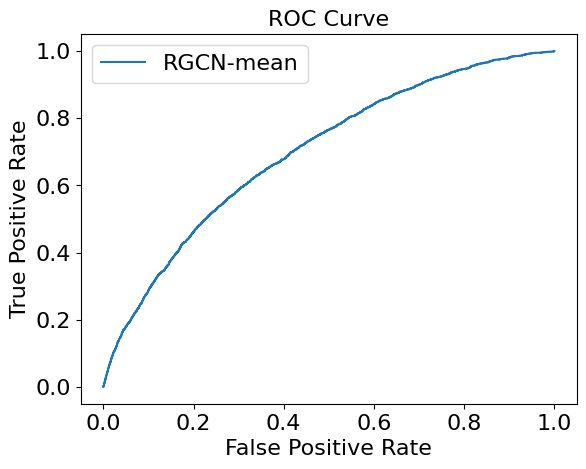

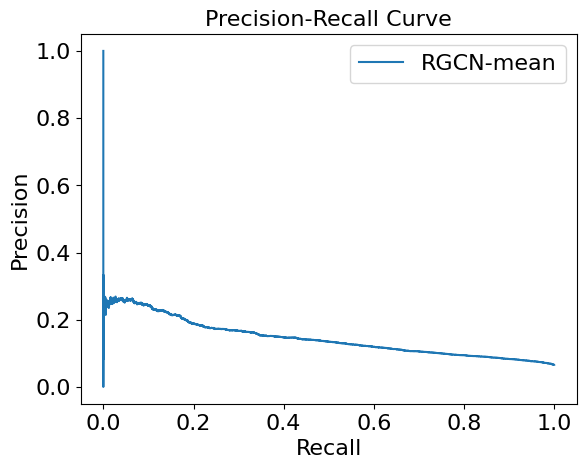

AUC for RGCN-mean: 0.6988772803222391
Precision-Recall AUC for RGCN-mean: 0.14447340065229317
F1 Score for RGCN-mean: 0.21549112938122025
Accuracy for RGCN-mean: 0.7917049632352942
Confusion Matrix for RGCN-mean:
[[33210  7436]
 [ 1629  1245]]



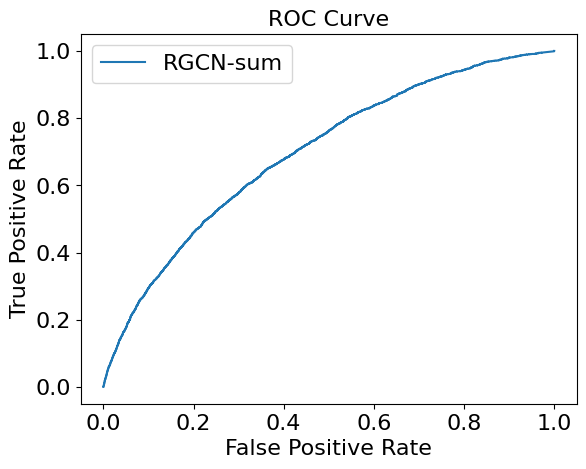

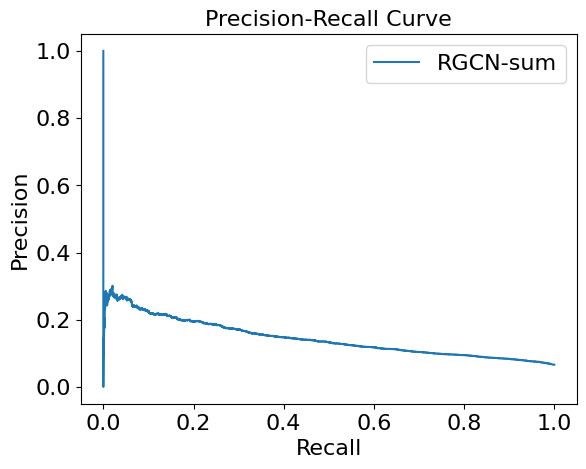

AUC for RGCN-sum: 0.69674168494061
Precision-Recall AUC for RGCN-sum: 0.1438470117293964
F1 Score for RGCN-sum: 0.21710928894872109
Accuracy for RGCN-sum: 0.8530101102941177
Confusion Matrix for RGCN-sum:
[[36236  4410]
 [ 1987   887]]



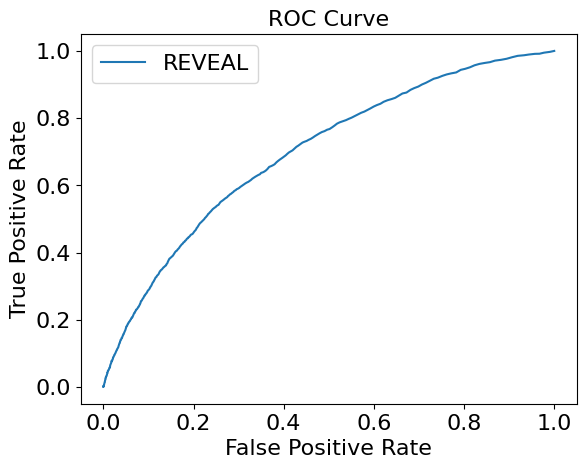

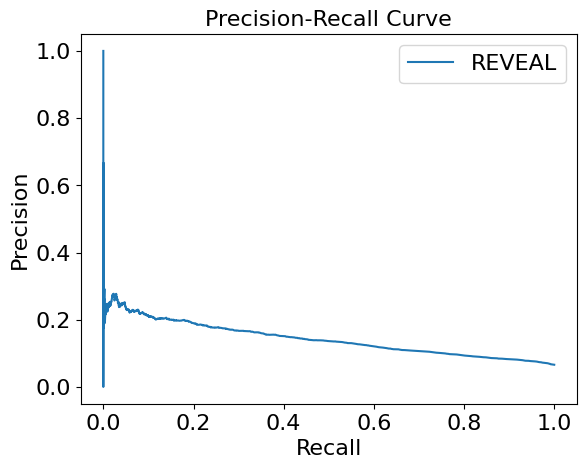

AUC for REVEAL: 0.6988822753313392
Precision-Recall AUC for REVEAL: 0.1422821845497751
F1 Score for REVEAL: 0.19984214680347276
Accuracy for REVEAL: 0.8835248161764706
Confusion Matrix for REVEAL:
[[37818  2828]
 [ 2241   633]]



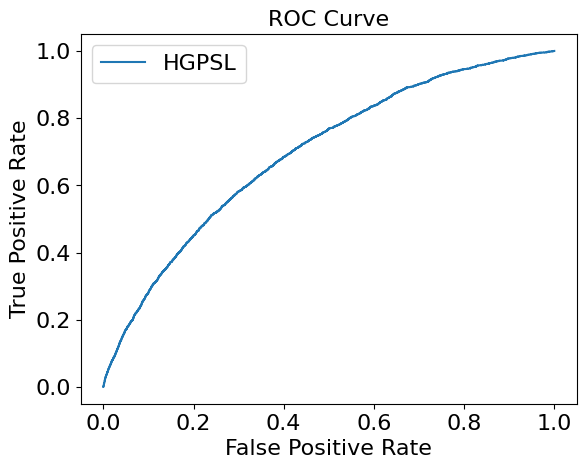

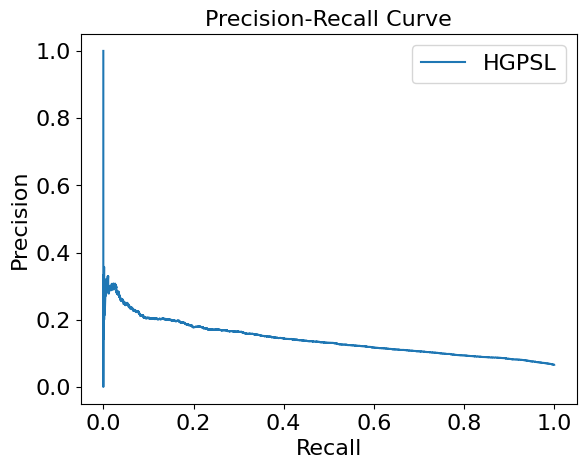

AUC for HGPSL: 0.6957339814466786
Precision-Recall AUC for HGPSL: 0.14097005507092011
F1 Score for HGPSL: 0.21183747100764538
Accuracy for HGPSL: 0.7891773897058824
Confusion Matrix for HGPSL:
[[33112  7534]
 [ 1641  1233]]



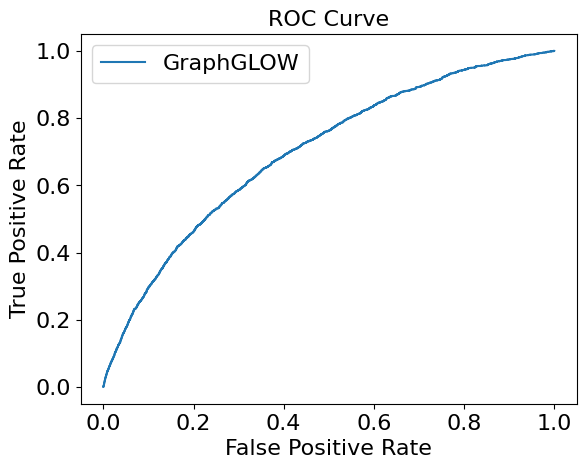

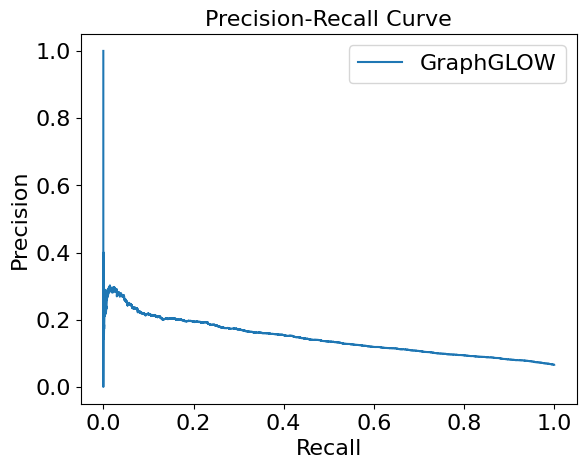

AUC for GraphGLOW: 0.6984518741873373
Precision-Recall AUC for GraphGLOW: 0.14466667398612465
F1 Score for GraphGLOW: 0.22163687676387583
Accuracy for GraphGLOW: 0.8098805147058824
Confusion Matrix for GraphGLOW:
[[34068  6578]
 [ 1696  1178]]



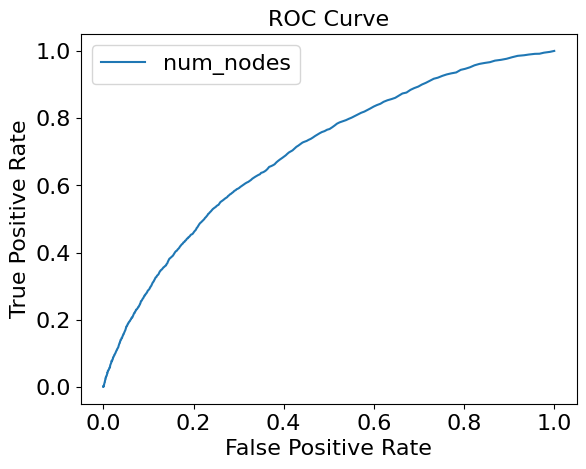

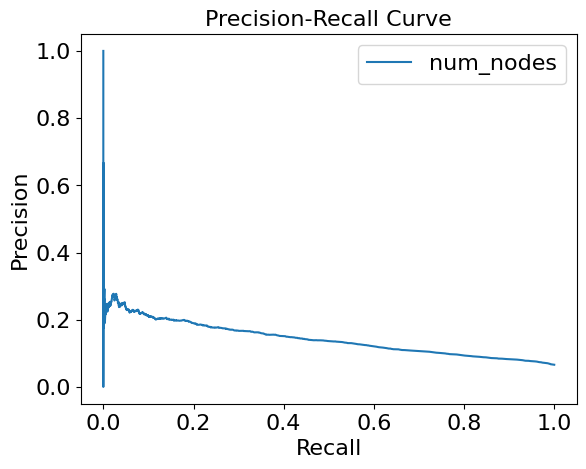

AUC for num_nodes: 0.6988822753313392
Precision-Recall AUC for num_nodes: 0.1422821845497751
F1 Score for num_nodes: 0.1238953312928396
Accuracy for num_nodes: 0.06603860294117647
Confusion Matrix for num_nodes:
[[    0 40646]
 [    0  2874]]



In [84]:
# make auc and precision-recall curves for each model
import sklearn.metrics as metrics

for model in datadict.keys():
    y_true = []
    y_pred = []
    for file in sizes.keys():
        y_true.append(datadict[model][file]['y'])
        y_pred.append(datadict[model][file]['logits'])
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=model)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_pred)
    plt.plot(recall, precision, label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
    
    auc = metrics.roc_auc_score(y_true, y_pred)
    print(f'AUC for {model}: {auc}')
    
    pr_auc = metrics.auc(recall, precision)
    print(f'Precision-Recall AUC for {model}: {pr_auc}')
    
    f1 = metrics.f1_score(y_true, [1 if pred > 0.5 else 0 for pred in y_pred])
    print(f'F1 Score for {model}: {f1}')
    
    acc = metrics.accuracy_score(y_true, [1 if pred > 0.5 else 0 for pred in y_pred])
    print(f'Accuracy for {model}: {acc}')
    
    cm = metrics.confusion_matrix(y_true, [1 if pred > 0.5 else 0 for pred in y_pred])
    print(f'Confusion Matrix for {model}:')
    print(cm)
    
    print()

In [13]:
# on sample basis compare the logits between all models, calculate the delta between min and max logit between all models
delta_files = {}
for filename in len_:
    min_logit = min([datadict[name][filename]['logits'] for name in names])
    max_logit = max([datadict[name][filename]['logits'] for name in names])
    delta_files[filename] = max_logit - min_logit
    

In [14]:
import matplotlib.pyplot as plt
# plot delta files sorted by delta
sorted_files = sorted(delta_files.items(), key=lambda x: x[1], reverse=True)
# sorted_files = sorted_files[:10]
fig, ax = plt.subplots()
ax.bar([x[0] for x in sorted_files], [x[1] for x in sorted_files])
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 